In [1]:
import scanpy as sc
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm, colors

import os

# Define the path to the directory you want to change to
new_directory = '/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/Human_scVI_single/DEG_analysis'

# Use os.chdir() to change the working directory
os.chdir(new_directory)

In [2]:
save_dir = '/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/Human_scVI_single/DEG_analysis'

In [3]:
from matplotlib import rcParams
from matplotlib import cm, colors

# Create a custom color map using 'PuRd' color map
colors2 = plt.cm.PuRd(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.585, 0.8, 20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [4]:
#Define a nice colour map for gene expression
colors2 = plt.cm.plasma(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.585,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap2 = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [5]:
plt.rcParams['figure.figsize']=(5,5) #rescale figures
sc.settings.verbosity = 3
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=300,transparent=True, fontsize=12) #color_map=mymap2)
sc.settings.figdir = '/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/Human_scVI_single/DEG_analysis/figures/genes/'
sc.logging.print_header()

scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.26.4 scipy==1.11.4 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.12


## Set up DEG lists

In [6]:
MOL_AL = pd.read_csv('./files/MOL_GvC_WM_v_AL_dream.csv', index_col=None)
MOL_AL.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
MOL_AL.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
MOL_AL.shape

(10487, 8)

In [7]:
MOL_AL[:5]

,gene,gene.1,logFC,AveExpr,t,Pvalue,Padj,B
0,FCHSD2,FCHSD2,1.581572,8.619551,13.883072,1.396070e-15,1.464058e-11,25.108251
1,OPALIN,OPALIN,3.605888,6.701410,12.501880,7.294486e-14,3.824864e-10,13.909813
2,KCNAB1,KCNAB1,3.377023,5.981777,10.714100,1.899705e-12,5.260495e-09,18.037926
3,INPP5F,INPP5F,-2.975575,6.433039,-11.694984,2.258445e-12,5.260495e-09,9.405133
4,ST8SIA5,ST8SIA5,-3.377412,5.242225,-10.601996,2.508103e-12,5.260495e-09,18.047799


In [8]:
MOL_RL = pd.read_csv('./files/MOL_GvC_WM_v_RL_dream.csv', index_col=None)
MOL_RL.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
MOL_RL.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
MOL_RL.shape

(12818, 9)

In [9]:
MOL_AL['logFC'] = MOL_AL['logFC'] * -1
MOL_AL[:5]

,gene,gene.1,logFC,AveExpr,t,Pvalue,Padj,B
0,FCHSD2,FCHSD2,-1.581572,8.619551,13.883072,1.396070e-15,1.464058e-11,25.108251
1,OPALIN,OPALIN,-3.605888,6.701410,12.501880,7.294486e-14,3.824864e-10,13.909813
2,KCNAB1,KCNAB1,-3.377023,5.981777,10.714100,1.899705e-12,5.260495e-09,18.037926
3,INPP5F,INPP5F,2.975575,6.433039,-11.694984,2.258445e-12,5.260495e-09,9.405133
4,ST8SIA5,ST8SIA5,3.377412,5.242225,-10.601996,2.508103e-12,5.260495e-09,18.047799


In [10]:

MOL_RL['logFC'] = MOL_RL['logFC'] * -1
MOL_RL[:5]

,gene,logFC,AveExpr,t,Pvalue,Padj,B,z.std,gene.1
0,FCHSD2,-2.157835,8.727854,17.221175,1.807438e-14,2.316774e-10,21.643558,7.663634,FCHSD2
1,KCNAB1,-4.466689,6.548477,12.991036,5.934711e-12,3.803556e-08,15.739906,6.881208,KCNAB1
2,AC022182.1,-2.425141,3.670108,11.280059,9.536502e-11,4.074630e-07,13.871828,6.474122,AC022182.1
3,PLPPR1,-2.145893,7.492648,11.587528,2.531274e-10,8.111468e-07,9.989267,6.325064,PLPPR1
4,MMP17,-3.519112,2.405612,8.706449,1.340425e-08,3.389688e-05,1.481296,5.680830,MMP17


In [11]:
# Filter for upregulated genes
MOL_AL_up = MOL_AL[(MOL_AL.Padj < 0.05) & (MOL_AL.logFC >= 1)]
print(MOL_AL_up.shape)

# Filter for downregulated genes
MOL_AL_down = MOL_AL[(MOL_AL.Padj < 0.05) & (MOL_AL.logFC <= -1)]
print(MOL_AL_down.shape)

(598, 8)
(274, 8)


In [12]:
# Filter for upregulated genes
MOL_RL_up = MOL_RL[(MOL_RL.Padj < 0.05) & (MOL_RL.logFC >= 1)]
print(MOL_RL_up.shape)

# Filter for downregulated genes
MOL_RL_down = MOL_RL[(MOL_RL.Padj < 0.05) & (MOL_RL.logFC <= -1)]
print(MOL_RL_down.shape)

(228, 9)
(256, 9)


In [13]:
# Filter for upregulated genes
MOL_AL_up = MOL_AL[(MOL_AL.Padj < 0.05) & (MOL_AL.logFC >= 0.585)]
print(MOL_AL_up.shape)

# Filter for downregulated genes
MOL_AL_down = MOL_AL[(MOL_AL.Padj < 0.05) & (MOL_AL.logFC <= -0.585)]
print(MOL_AL_down.shape)

(1012, 8)
(610, 8)


In [14]:
# Filter for upregulated genes
MOL_RL_up = MOL_RL[(MOL_RL.Padj < 0.05) & (MOL_RL.logFC >= 0.585)]
print(MOL_RL_up.shape)

# Filter for downregulated genes
MOL_RL_down = MOL_RL[(MOL_RL.Padj < 0.05) & (MOL_RL.logFC <= -0.585)]
print(MOL_RL_down.shape)

(367, 9)
(365, 9)


# Volcano plot

In [15]:
#### Need to reset sigs so that it contains all the genes
sigs= MOL_AL
sigs['symbol'] = sigs['gene']
sigs['nlog10'] = -np.log10(sigs.Padj)
sigs = sigs.sort_values(by='logFC')
sigs

,gene,gene.1,logFC,AveExpr,t,Pvalue,Padj,B,symbol,nlog10
68,TMEM132B,TMEM132B,-4.204333,3.570902,6.995350,4.500053e-08,6.839429e-06,7.056825,TMEM132B,5.164980
138,ATP8A2,ATP8A2,-3.931424,4.591422,6.089010,7.265067e-07,5.405702e-05,5.861247,ATP8A2,4.267148
33,PLCL2,PLCL2,-3.647650,3.876999,7.801878,5.460501e-09,1.658317e-06,6.216093,PLCL2,5.780332
1,OPALIN,OPALIN,-3.605888,6.701410,12.501880,7.294486e-14,3.824864e-10,13.909813,OPALIN,9.417384
2,KCNAB1,KCNAB1,-3.377023,5.981777,10.714100,1.899705e-12,5.260495e-09,18.037926,KCNAB1,8.278973
...,...,...,...,...,...,...,...,...,...,...
103,SERPINE1,SERPINE1,5.038207,1.175630,-6.639030,2.644556e-07,2.666679e-05,4.811449,SERPINE1,4.574029
70,EMP1,EMP1,5.101796,1.473179,-7.168967,5.435671e-08,8.028716e-06,4.044970,EMP1,5.095354
71,ANXA2,ANXA2,5.346736,2.113728,-7.432187,5.560261e-08,8.098675e-06,1.977122,ANXA2,5.091586
160,EGR1,EGR1,5.367430,2.613755,-6.039521,1.031502e-06,6.718855e-05,4.278097,EGR1,4.172705


In [17]:
sigs_both = sigs[(sigs.Padj < 0.05) & (abs(sigs.logFC) >= 0.585)]
print(sigs_both.shape)

sigs_up = sigs[(sigs.Padj < 0.05) & (sigs.logFC >= 0.585)]
print(sigs_up.shape)

sigs_down = sigs[(sigs.Padj < 0.05) & (sigs.logFC <= -0.585)]
print(sigs_down.shape)

(1622, 10)
(1012, 10)
(610, 10)


In [18]:
# Extracting the top 50 upregulated genes
top_up = sigs_up.sort_values(by='logFC', ascending=False).head(50)['symbol'].tolist()
print("Top 50 upregulated genes:")
print(top_up)

# Extracting the top 50 downregulated genes
top_down = sigs_down.sort_values(by='logFC', ascending=True).head(50)['symbol'].tolist()
print("Top 50 downregulated genes:")
print(top_down)

Top 50 upregulated genes:
['GBP2', 'EGR1', 'ANXA2', 'EMP1', 'SERPINE1', 'LGALS3', 'GPRC5A', 'ARHGAP24', 'GFAP', 'OSMR-AS1', 'VGF', 'FOXP2', 'HLA-B', 'FOS', 'SCN9A', 'MBOAT1', 'MPP6', 'TNFRSF1A', 'ADAMTS12', 'LGALS1', 'AL365255.1', 'CLCF1', 'VSIR', 'PARP14', 'CD44', 'IL6R', 'RGS17', 'SNX10', 'CCL24', 'VIM', 'ITGA5', 'FOSL2', 'APOE', 'TNFRSF19', 'FAM129B', 'WNT2', 'HLA-F', 'HSPA6', 'MYO7A', 'SHISA6', 'RSAD2', 'LUCAT1', 'CPXM2', 'TIMP1', 'PROS1', 'HLA-E', 'ST8SIA5', 'TMEM178A', 'C3orf70', 'NGFR']
Top 50 downregulated genes:
['TMEM132B', 'ATP8A2', 'PLCL2', 'OPALIN', 'KCNAB1', 'LINC01299', 'LINC02073', 'TMEM178B', 'MMP17', 'RASAL1', 'GRIK2', 'ARPP21', 'AC012593.1', 'SVEP1', 'AC091826.2', 'SLC25A48', 'AC007221.1', 'LRRTM4', 'DPP10', 'CDH1', 'CNTN1', 'SNAP91', 'PAK5', 'AL078590.3', 'INSYN2B', 'TMEM179', 'LDB2', 'SEMA6D', 'SV2B', 'AC007221.2', 'AC006270.1', 'GRM7', 'AC004784.1', 'IFNG-AS1', 'MDGA2', 'ADAMTS17', 'LINC01099', 'TPPP3', 'LINC01411', 'SLC16A1', 'KCNMB2-AS1', 'ADGRA3', 'AL392023.2',

In [19]:
sigs_up = sigs_up.sort_values(by='logFC', ascending=False)
sigs_up[:20]

,gene,gene.1,logFC,AveExpr,t,Pvalue,Padj,B,symbol,nlog10
45,GBP2,GBP2,6.123773,2.562658,-8.010834,1.288585e-08,2.880693e-06,4.909171,GBP2,5.540503
160,EGR1,EGR1,5.367430,2.613755,-6.039521,1.031502e-06,6.718855e-05,4.278097,EGR1,4.172705
71,ANXA2,ANXA2,5.346736,2.113728,-7.432187,5.560261e-08,8.098675e-06,1.977122,ANXA2,5.091586
70,EMP1,EMP1,5.101796,1.473179,-7.168967,5.435671e-08,8.028716e-06,4.044970,EMP1,5.095354
103,SERPINE1,SERPINE1,5.038207,1.175630,-6.639030,2.644556e-07,2.666679e-05,4.811449,SERPINE1,4.574029
82,LGALS3,LGALS3,4.836364,1.383500,-7.432317,1.213868e-07,1.533715e-05,6.061271,LGALS3,4.814255
30,GPRC5A,GPRC5A,4.776438,1.950687,-8.189582,4.313247e-09,1.459130e-06,8.890176,GPRC5A,5.835906
133,ARHGAP24,ARHGAP24,4.622828,4.639550,-6.544913,6.995042e-07,5.405702e-05,2.809745,ARHGAP24,4.267148
460,GFAP,GFAP,4.596972,2.382475,-4.783564,4.657792e-05,1.058727e-03,0.988963,GFAP,2.975216
207,OSMR-AS1,OSMR-AS1,4.501269,2.313529,-6.390521,2.772691e-06,1.397943e-04,4.691184,OSMR-AS1,3.854511


In [20]:
sigs_down = sigs_down.sort_values(by='logFC', ascending=True)
sigs_down[:20]

,gene,gene.1,logFC,AveExpr,t,Pvalue,Padj,B,symbol,nlog10
68,TMEM132B,TMEM132B,-4.204333,3.570902,6.995350,4.500053e-08,6.839429e-06,7.056825,TMEM132B,5.164980
138,ATP8A2,ATP8A2,-3.931424,4.591422,6.089010,7.265067e-07,5.405702e-05,5.861247,ATP8A2,4.267148
33,PLCL2,PLCL2,-3.647650,3.876999,7.801878,5.460501e-09,1.658317e-06,6.216093,PLCL2,5.780332
1,OPALIN,OPALIN,-3.605888,6.701410,12.501880,7.294486e-14,3.824864e-10,13.909813,OPALIN,9.417384
2,KCNAB1,KCNAB1,-3.377023,5.981777,10.714100,1.899705e-12,5.260495e-09,18.037926,KCNAB1,8.278973
65,LINC01299,LINC01299,-2.913095,3.593926,7.201779,3.691468e-08,5.865520e-06,5.428372,LINC01299,5.231694
32,LINC02073,LINC02073,-2.794003,4.567870,7.934674,4.939131e-09,1.569596e-06,7.930158,LINC02073,5.804212
263,TMEM178B,TMEM178B,-2.749747,4.057778,5.339619,6.193903e-06,2.460434e-04,3.826877,TMEM178B,3.608988
184,MMP17,MMP17,-2.720430,2.462376,5.791687,1.796590e-06,1.018424e-04,4.822726,MMP17,3.992071
61,RASAL1,RASAL1,-2.701496,5.278073,7.558768,3.084190e-08,5.216758e-06,7.124755,RASAL1,5.282599


In [21]:
# Extracting the top 50 downregulated genes
top_down = sigs_down.sort_values(by='logFC', ascending=True).head(50)['symbol'].tolist()
print("Top 50 downregulated genes:")
print(top_down)

Top 50 downregulated genes:
['TMEM132B', 'ATP8A2', 'PLCL2', 'OPALIN', 'KCNAB1', 'LINC01299', 'LINC02073', 'TMEM178B', 'MMP17', 'RASAL1', 'GRIK2', 'ARPP21', 'AC012593.1', 'SVEP1', 'AC091826.2', 'SLC25A48', 'AC007221.1', 'LRRTM4', 'DPP10', 'CDH1', 'CNTN1', 'SNAP91', 'PAK5', 'AL078590.3', 'INSYN2B', 'TMEM179', 'LDB2', 'SEMA6D', 'SV2B', 'AC007221.2', 'AC006270.1', 'GRM7', 'AC004784.1', 'IFNG-AS1', 'MDGA2', 'ADAMTS17', 'LINC01099', 'TPPP3', 'LINC01411', 'SLC16A1', 'KCNMB2-AS1', 'ADGRA3', 'AL392023.2', 'PCDH7', 'CLVS1', 'AC020909.2', 'AP002956.1', 'PDE10A', 'RNASE1', 'SYT16']


In [22]:
genes_to_show = ['CDKN1A', 'SOCS3', 'ISG20', 'NFKBIA', 'IRF1', 'TRIM26', 'STAT3', 'GBP2', 'IFI27', 'IRF7',
                 'TNFRSF1A', 'NRXN1', 'RBFOX1', 'NRG3', 'CHST2', 'KANK4', 'EGR1', 'EGR3', 'VGF', 'VIM', 'ANXA2',
                 'S100A1', 'CHST2', 'MDGA2', 'CACNA1C', 'KCNMA1'
                ]

In [23]:
#picked1 and picked2 simulate user lists of genes to label by color
picked1 = sigs_up.symbol.tolist()
picked2 = sigs_down.symbol.tolist()

def map_color(a):
    logFC, symbol, nlog10 = a
    
    if abs(logFC) < 0.585 or nlog10 < 1.3:
        return 'not sig.'
    if symbol in picked1:
        return 'Up in AL/CAL'
    if symbol in picked2:
        return 'Down in AL/CAL'
    
    return 'not sig.'

sigs['color'] = sigs[['logFC', 'symbol', 'nlog10']].apply(map_color, axis = 1)

In [24]:
print(sigs['color'].unique())  # Check all unique values in the color column

['Down in AL/CAL' 'not sig.' 'Up in AL/CAL']


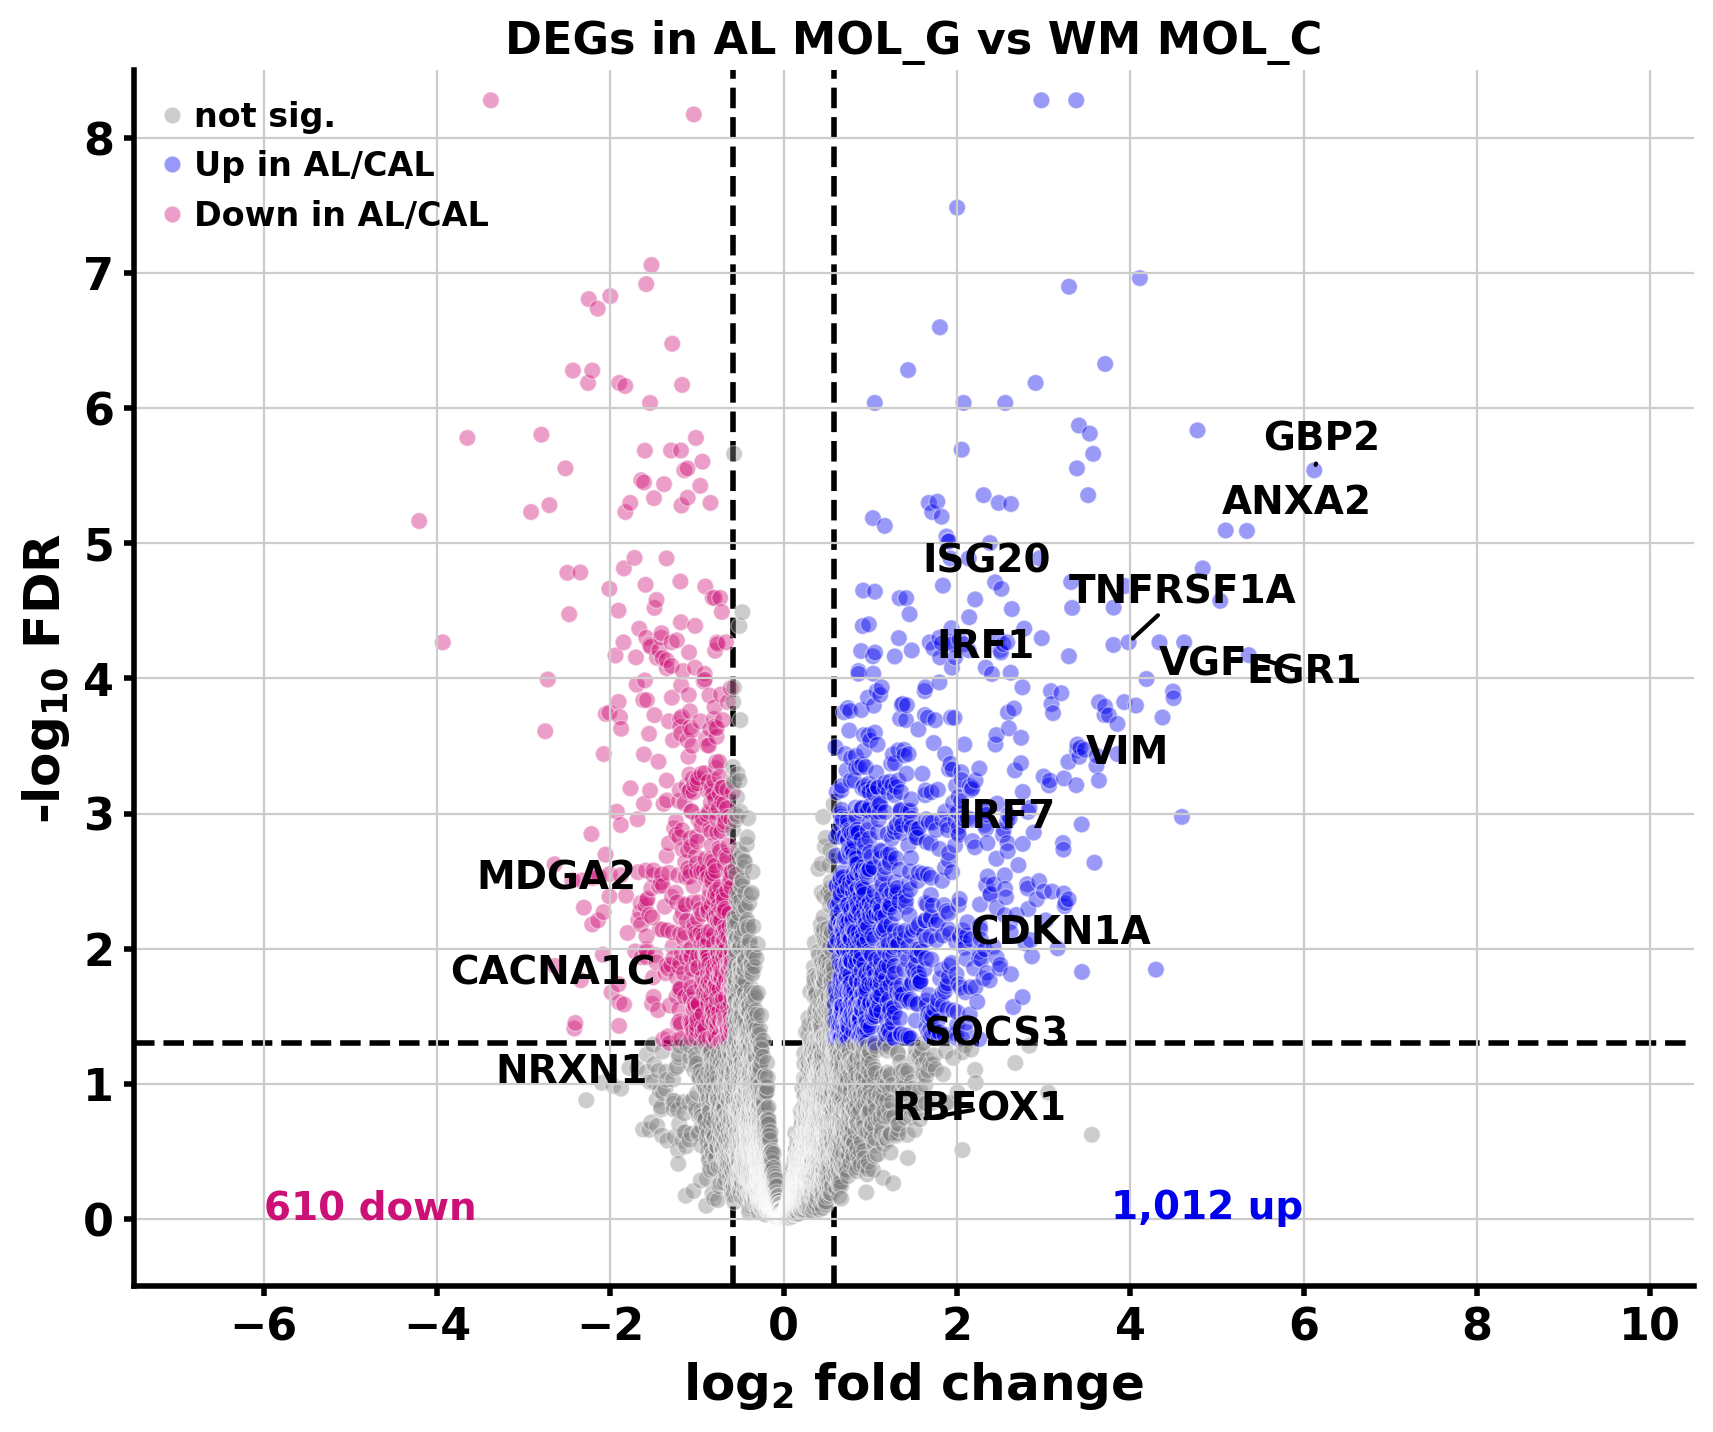

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.figure(figsize=(10, 8))  # Adjust figure size as needed

ax = sns.scatterplot(data=sigs, x='logFC', y='nlog10',
                     hue='color',
                     hue_order=['not sig.', 'Up in AL/CAL', 'Down in AL/CAL'],
                     palette=['#808080', '#0000EE', '#CD1076'],
                     markers='o',
                     alpha=0.4)  # Adjust the alpha value as needed

ax.axhline(1.3, zorder=0, c='k', lw=2, ls='--')
ax.axvline(0.585, zorder=0, c='k', lw=2, ls='--')
ax.axvline(-0.585, zorder=0, c='k', lw=2, ls='--')

texts = []
for i in range(len(sigs)):
    if sigs.iloc[i].symbol in genes_to_show:
        x_pos = sigs.iloc[i].logFC
        y_pos = sigs.iloc[i].nlog10
        label = sigs.iloc[i].symbol
        if x_pos > 1:  # For upregulated genes
            texts.append(plt.text(x=x_pos, y=y_pos, s=label, fontsize=14, weight='bold', ha='left'))
        elif x_pos < -1:  # For downregulated genes
            texts.append(plt.text(x=x_pos, y=y_pos, s=label, fontsize=14, weight='bold', ha='right'))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=1.5))  # Adjust arrowprops for longer lines

ax.text(-6, 0, '610 down', fontsize=14, color='#CD1076', weight='bold', ha='left')  # Adjust the position as needed
ax.text(6, 0, '1,012 up', fontsize=14, color='#0000EE', weight='bold', ha='right')  # Adjust the position as needed

# Extend x-axis limits
plt.xlim(-7.5, 10.5)
plt.ylim(-0.5, 8.5)

# Move legend to the center right within the plot
#plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), frameon=False, prop={'weight': 'bold'})
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon=False, prop={'weight': 'bold', 'size': 12})

plt.title('DEGs in AL MOL_G vs WM MOL_C', size=16, weight='bold')

# Adjust spines and ticks
for spine in ['bottom', 'left', 'top', 'right']:
    ax.spines[spine].set_linewidth(2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(width=2)
plt.xticks(size=16, weight='bold')
plt.yticks(size=16, weight='bold')

plt.xlabel(r"$\mathbf{log_{2}}$ fold change", size=18, weight='bold')
plt.ylabel(r"-$\mathbf{log_{10}}$ FDR", size=18, weight='bold')

#plt.savefig('./figures/volcanopy_MOL_AL_CAL.png', dpi=600, bbox_inches='tight', facecolor='none')

plt.show()

# Upset plots

In [221]:
from upsetplot import plot
from upsetplot import from_contents
from upsetplot import UpSet

In [222]:
print(len(MOL_AL))

10487


In [223]:
print(len(MOL_RL))

12818


In [224]:
# Filter for upregulated genes
MOL_AL_up = MOL_AL[(MOL_AL.Padj < 0.05) & (MOL_AL.logFC >= 0.585)]
print(MOL_AL_up.shape)

# Filter for downregulated genes
MOL_AL_down = MOL_AL[(MOL_AL.Padj < 0.05) & (MOL_AL.logFC <= -0.585)]
print(MOL_AL_down.shape)

(1012, 8)
(610, 8)


In [225]:
# Filter for upregulated genes
MOL_RL_up = MOL_RL[(MOL_RL.Padj < 0.05) & (MOL_RL.logFC >= 0.585)]
print(MOL_RL_up.shape)

# Filter for downregulated genes
MOL_RL_down = MOL_RL[(MOL_RL.Padj < 0.05) & (MOL_RL.logFC <= -0.585)]
print(MOL_RL_down.shape)

(367, 9)
(365, 9)


In [226]:
## IMPORTANT FILTER FOR GENES TESTING IN ALL CONDITIONS

genes_all_conditions = set(MOL_AL['gene']) & \
                       set(MOL_RL['gene'])

In [227]:
len(genes_all_conditions)

10298

In [228]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene'].isin(genes_all_conditions)]

# Apply filtering to each DEG DataFrame
MOL_AL_up = filter_genes(MOL_AL_up)
MOL_RL_up = filter_genes(MOL_RL_up)

print(MOL_AL_up.shape)
print(MOL_RL_up.shape)

(905, 8)
(294, 9)


In [229]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene'].isin(genes_all_conditions)]

# Apply filtering to each DEG DataFrame
MOL_AL_down = filter_genes(MOL_AL_down)
MOL_RL_down = filter_genes(MOL_RL_down)

print(MOL_AL_down.shape)
print(MOL_RL_down.shape)

(610, 8)
(289, 9)


In [230]:
# Create gene lists from the dfs:
#genes_OPC_de_up = OPC_AL_up['gene'].tolist()
#genes_OPC_re_up = OPC_RL_up['gene'].tolist()
genes_LPC_de_up = MOL_AL_up['gene'].tolist()
genes_LPC_re_up = MOL_RL_up['gene'].tolist()

In [231]:
# Create DataFrames for each gene list
# Define the function to create a DataFrame
def create_gene_df(genes_list, column_name):
    return pd.DataFrame(genes_list, columns=[column_name])

# Create DataFrames for each gene list
#OPC_de_up_df = create_gene_df(genes_OPC_de_up, 'OPC_de_up')
#OPC_re_up_df = create_gene_df(genes_OPC_re_up, 'OPC_re_up')
LPC_de_up_df = create_gene_df(genes_LPC_de_up, 'LPC_de_up')
LPC_re_up_df = create_gene_df(genes_LPC_re_up, 'LPC_re_up')

In [232]:
# Create DataFrames for each gene list using the new gene lists
#OPC_de_up_df = pd.DataFrame({'OPC_de_up': True, 'Name': genes_OPC_de_up})
#OPC_re_up_df = pd.DataFrame({'OPC_re_up': True, 'Name': genes_OPC_re_up})
LPC_de_up_df = pd.DataFrame({'LPC_de_up': True, 'Name': genes_LPC_de_up})
LPC_re_up_df = pd.DataFrame({'LPC_re_up': True, 'Name': genes_LPC_re_up})

In [233]:
# Merge all the DataFrames hierarchically
up_df = LPC_de_up_df.merge(
    LPC_re_up_df, on='Name', how='outer'
)

# Replace NaN with False
up_df = up_df.fillna(False)

# Set index for the data frame
up_df_plot = up_df.set_index([
    'LPC_de_up', 'LPC_re_up'
])

# Print the merged DataFrame
print("Upregulated genes DataFrame:")
print(up_df_plot)

Upregulated genes DataFrame:
                        Name
LPC_de_up LPC_re_up         
True      False         AACS
          False         ABAT
          True         ABCA6
          False        ABCA9
          False      ABHD12B
...                      ...
          False       ZNF611
          False       ZNF618
          False       ZNF787
          False         ZPR1
          True        ZSWIM4

[1003 rows x 1 columns]


/tmp/1210446.1.gpu/ipykernel_3443122/3825796723.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  up_df = up_df.fillna(False)


/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

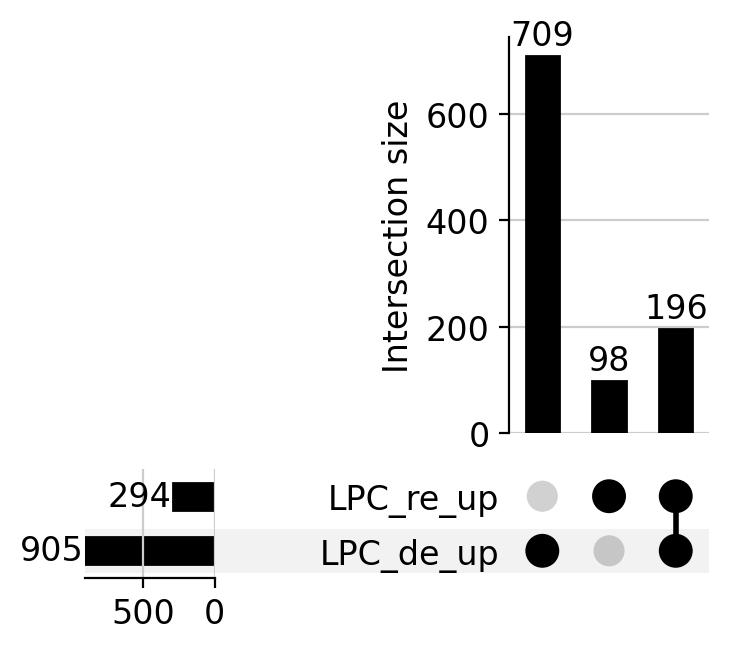

In [234]:
upset_plot = UpSet(up_df_plot, subset_size='count', show_counts=True,).plot()

# Now down

In [235]:
# Create gene lists from the dfs:
#genes_OPC_de_down = OPC_AL_down['gene'].tolist()
#genes_OPC_re_down = OPC_RL_down['gene'].tolist()
genes_LPC_de_down = MOL_AL_down['gene'].tolist()
genes_LPC_re_down = MOL_RL_down['gene'].tolist()

# Create DataFrames for each gene list
#OPC_de_down_df = create_gene_df(genes_OPC_de_down, 'OPC_de_down')
#OPC_re_down_df = create_gene_df(genes_OPC_re_down, 'OPC_re_down')
LPC_de_down_df = create_gene_df(genes_LPC_de_down, 'LPC_de_down')
LPC_re_down_df = create_gene_df(genes_LPC_re_down, 'LPC_re_down')

# Create DataFrames for each gene list using the new gene lists
#OPC_de_down_df = pd.DataFrame({'OPC_de_down': True, 'Name': genes_OPC_de_down})
#OPC_re_down_df = pd.DataFrame({'OPC_re_down': True, 'Name': genes_OPC_re_down})
LPC_de_down_df = pd.DataFrame({'LPC_de_down': True, 'Name': genes_LPC_de_down})
LPC_re_down_df = pd.DataFrame({'LPC_re_down': True, 'Name': genes_LPC_re_down})

In [236]:
# Merge all the DataFrames hierarchically
down_df = LPC_de_down_df.merge(
    LPC_re_down_df, on='Name', how='outer'
)

# Replace NaN with False
down_df = down_df.fillna(False)

# Set index for the data frame
down_df_plot = down_df.set_index([
    'LPC_de_down', 'LPC_re_down',
])

# Print the merged DataFrame
print("Downregulated genes DataFrame:")
print(down_df_plot)

Downregulated genes DataFrame:
                               Name
LPC_de_down LPC_re_down            
False       True              ABCA1
            True              ABCG1
True        False           ABHD17B
            False             ABHD6
False       True         AC000120.3
...                             ...
True        False            ZNF682
            False           ZNF780B
            True             ZNF883
            False            ZRANB2
            True            ZSCAN30

[717 rows x 1 columns]


/tmp/1210446.1.gpu/ipykernel_3443122/3980107266.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  down_df = down_df.fillna(False)


In [237]:
# Dictionary to map old index names to new index names
index_name_map = {
    'OPC_de_down': 'OPC_AL',
    #'OPC_re_down': 'OPC_RL',
    'LPC_de_down': 'MOL_G_AL',
    'LPC_re_down': 'MOL_G_RL',
}

# Rename the index levels using the dictionary
down_df_plot.index = down_df_plot.index.rename(index_name_map)

print("Updated Upregulated genes DataFrame:")
print(down_df_plot)

Updated Upregulated genes DataFrame:
                         Name
MOL_G_AL MOL_G_RL            
False    True           ABCA1
         True           ABCG1
True     False        ABHD17B
         False          ABHD6
False    True      AC000120.3
...                       ...
True     False         ZNF682
         False        ZNF780B
         True          ZNF883
         False         ZRANB2
         True         ZSCAN30

[717 rows x 1 columns]


/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

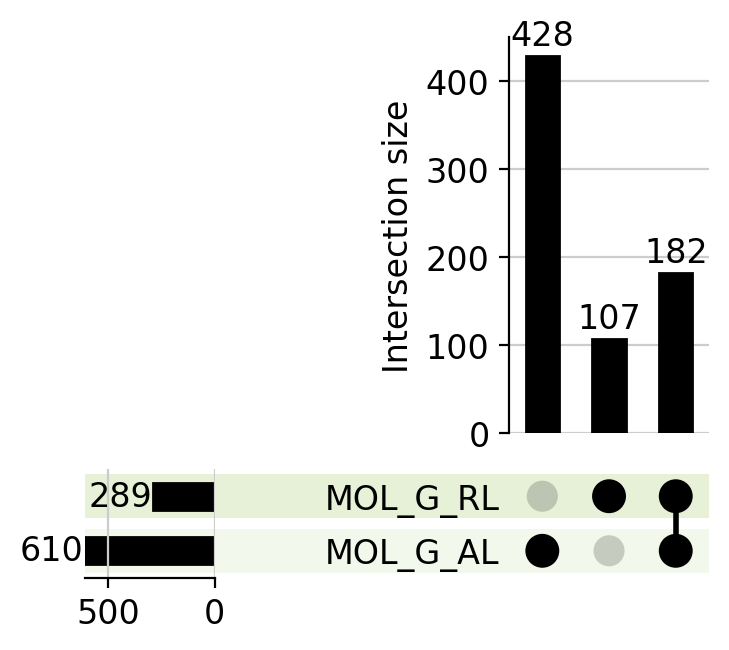

In [238]:
# Create UpSet plot
upset = UpSet(down_df_plot, subset_size='count', show_counts=True, facecolor="black")

# Style the subsets
upset.style_categories(
    'MOL_G_AL',
    shading_facecolor="#f2f8eb",
)

# Style the subsets
upset.style_categories(
    'MOL_G_RL',
    shading_facecolor="#e6f1d8",
)

# Plot the UpSet plot
upset.plot()
plt.suptitle("")

# Save the plot as PDF
#plt.savefig('./figures/hs_OL_only_upset_plot_down.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

# Venns

In [239]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

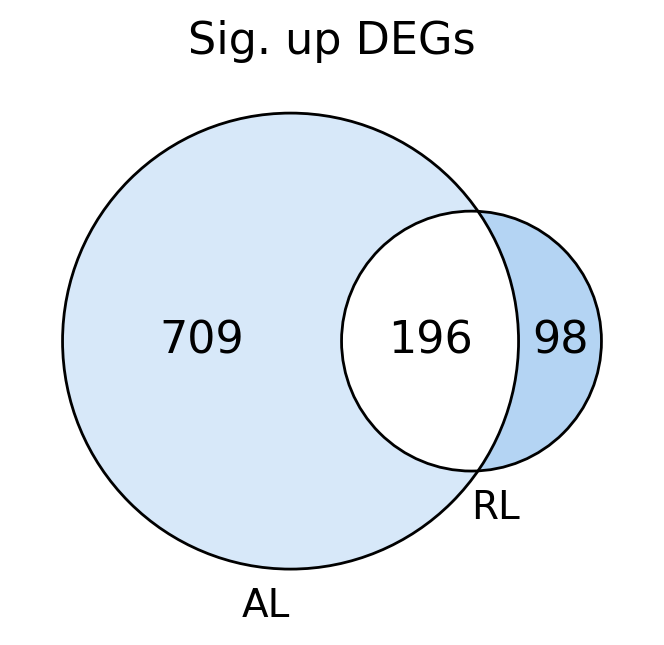

In [240]:
# Convert lists to sets
set_LPC_de_MOL_up = set(genes_LPC_de_up)
set_LPC_re_MOL_up = set(genes_LPC_re_up)

# Calculate lengths and overlap
length_LPC_de = len(set_LPC_de_MOL_up) - len(set_LPC_de_MOL_up & set_LPC_re_MOL_up)
length_LPC_re = len(set_LPC_re_MOL_up) - len(set_LPC_de_MOL_up & set_LPC_re_MOL_up)

genes_common_up = set_LPC_de_MOL_up & set_LPC_re_MOL_up
length_common = len(genes_common_up)

# Set labels and colors
set_labels = ('AL', 'RL')
set_colors = ('#cde3f8', '#a1caf1')

# Plot Venn diagram
venn = venn2(subsets=(length_LPC_de, length_LPC_re, length_common),
             set_labels=set_labels,
             set_colors=set_colors,
             alpha=0.8)  # Adjust transparency here

venn2_circles(subsets=(length_LPC_de, length_LPC_re, length_common), linewidth=1)

# Increase font size for the subset counts inside the circles
for subset in venn.subset_labels:
    subset.set_fontsize(16)  # Set the font size for the text inside the circles

# Increase text size for the set labels
for text in venn.set_labels:
    text.set_fontsize(14)

# Display the plot
plt.title('Sig. up DEGs', fontsize=16)
plt.savefig('./figures/venn2_MOL_de_re_up.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [241]:
print(length_common)
print(genes_common_up)

196
{'SHROOM1', 'DTX3L', 'CTTNBP2NL', 'BCAR3', 'NCMAP', 'RGMB', 'RELL1', 'ITPKB', 'SPATA1', 'MYRIP', 'VOPP1', 'CRTAC1', 'TNFAIP8', 'TUBB2B', 'ITGB5', 'RASGEF1C', 'C1orf61', 'ZMIZ1', 'HLA-B', 'ABCA6', 'ZC3HAV1', 'ARHGAP24', 'C2CD2', 'VIM', 'POR', 'LIN9', 'SNHG12', 'TUBB2A', 'ARHGAP39', 'WWC2', 'VASP', 'FAM201A', 'AC084032.1', 'ISG20', 'EML3', 'FAM43A', 'NCK2', 'MFGE8', 'PKNOX2', 'TNIP2', 'MOB1B', 'RARA', 'LITAF', 'TCAF2', 'KIAA0586', 'ZNF486', 'COL18A1', 'ERAP2', 'EPHA10', 'NR4A1', 'TNFRSF19', 'EGR1', 'CANT1', 'SS18L2', 'AL133523.1', 'TMEM120A', 'DPY19L1', 'HERC6', 'PIEZO1', 'SHISA6', 'P3H2', 'SCN9A', 'ANKDD1A', 'ANO10', 'MED16', 'KLF6', 'NGFR', 'BTBD6', 'DDX60L', 'PROS1', 'TMEM164', 'ARHGDIA', 'NAV2', 'FNTB', 'MBOAT1', 'IFIH1', 'NRP2', 'NOD1', 'EPB41', 'BTN3A2', 'AC011483.1', 'RASSF8', 'SMYD2', 'C3orf70', 'ACTN2', 'N4BP2', 'GALNT7', 'SIPA1L2', 'PHACTR1', 'GPC5', 'DCAF15', 'FOXP4', 'CAV2', 'NACC2', 'PML', 'SEMA4B', 'ENPP6', 'SERTAD1', 'ZSWIM4', 'LASP1', 'PRKRA-AS1', 'STK10', 'FAM129B', 

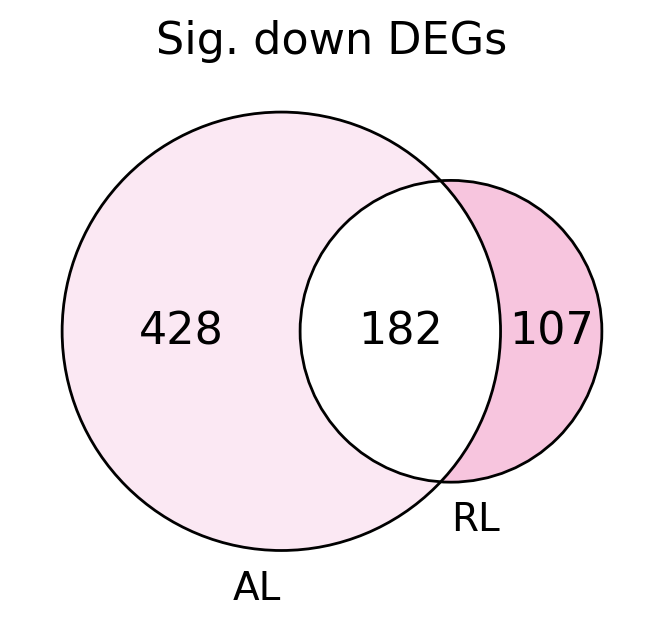

In [242]:
# Convert lists to sets
set_LPC_de_MOL_down = set(genes_LPC_de_down)  # Genes for demyelination
set_LPC_re_MOL_down = set(genes_LPC_re_down)  # Genes for remyelination

# Calculate lengths and overlap
length_LPC_de_down = len(set_LPC_de_MOL_down) - len(set_LPC_de_MOL_down & set_LPC_re_MOL_down)
length_LPC_re_down = len(set_LPC_re_MOL_down) - len(set_LPC_de_MOL_down & set_LPC_re_MOL_down)

genes_common_down = set_LPC_de_MOL_down & set_LPC_re_MOL_down
length_common_down = len(genes_common_down)

# Set labels and colors
set_labels = ('AL', 'RL')
set_colors = ('#fbe3f0', '#f5b7d6')

# Plot Venn diagram
venn = venn2(subsets=(length_LPC_de_down, length_LPC_re_down, length_common_down),
             set_labels=set_labels,
             set_colors=set_colors,
             alpha=0.8)  # Adjust transparency here

venn2_circles(subsets=(length_LPC_de_down, length_LPC_re_down, length_common_down), linewidth=1)

# Increase font size for the subset counts inside the circles
for subset in venn.subset_labels:
    subset.set_fontsize(16)  # Set the font size for the text inside the circles

# Increase text size for the set labels
for text in venn.set_labels:
    text.set_fontsize(14)

# Display the plot
plt.title('Sig. down DEGs', fontsize=16)
plt.savefig('./figures/venn2_MOL_de_re_down.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [243]:
print(length_common_down)
print(genes_common_down)

182
{'INSYN2B', 'NAPEPLD', 'LIX1-AS1', 'FRY', 'AC066613.2', 'BORCS5', 'TMIGD3', 'ZNF883', 'ADA', 'GRIA3', 'ENOX2', 'LAMA2', 'AC004918.1', 'HHIP', 'LSAMP', 'TP53TG5', 'GRM7', 'MLLT3', 'TMEM179', 'LINC02073', 'LINC01411', 'AC105383.1', 'LINC00639', 'LINC00461', 'PDE10A', 'AC113383.1', 'AC026746.1', 'CCDC102B', 'ARL6', 'EFCAB11', 'MIR181A2HG', 'GALNT10', 'SLC16A1', 'MIPEP', 'SLC4A8', 'THY1', 'LINC01608', 'PLXDC2', 'PALM2-AKAP2', 'TMEM171', 'AC078881.1', 'AC012593.1', 'CCP110', 'ZSCAN30', 'GALNT6', 'LINC01099', 'PRKCQ', 'ATP8A2', 'UNC79', 'UFL1-AS1', 'ANO4', 'ADGRL3', 'ATG4C', 'DAB2IP', 'SH3TC2-DT', 'DYSF', 'ERBB4', 'PLCL2', 'ADAMTS17', 'MMP17', 'NECAB1', 'SVEP1', 'NAALAD2', 'ANK3', 'AP002956.1', 'ATP5IF1', 'GRIA2', 'PLEKHG3', 'CAVIN4', 'TMEM132B', 'LRP6', 'AP003100.2', 'AC079950.1', 'VSTM2B', 'SIPA1L1', 'AC115622.1', 'AC004158.1', 'HS3ST5', 'RASAL1', 'SNAP91', 'AC007221.2', 'DOCK2', 'KCNH8', 'PAK5', 'PPP2R2B', 'CPB2-AS1', 'IFNG-AS1', 'SYT16', 'CDH1', 'CREB5', 'CPB2', 'AL139807.1', 'NOS1',

In [244]:
print("\n".join(genes_common_down))

INSYN2B
NAPEPLD
LIX1-AS1
FRY
AC066613.2
BORCS5
TMIGD3
ZNF883
ADA
GRIA3
ENOX2
LAMA2
AC004918.1
HHIP
LSAMP
TP53TG5
GRM7
MLLT3
TMEM179
LINC02073
LINC01411
AC105383.1
LINC00639
LINC00461
PDE10A
AC113383.1
AC026746.1
CCDC102B
ARL6
EFCAB11
MIR181A2HG
GALNT10
SLC16A1
MIPEP
SLC4A8
THY1
LINC01608
PLXDC2
PALM2-AKAP2
TMEM171
AC078881.1
AC012593.1
CCP110
ZSCAN30
GALNT6
LINC01099
PRKCQ
ATP8A2
UNC79
UFL1-AS1
ANO4
ADGRL3
ATG4C
DAB2IP
SH3TC2-DT
DYSF
ERBB4
PLCL2
ADAMTS17
MMP17
NECAB1
SVEP1
NAALAD2
ANK3
AP002956.1
ATP5IF1
GRIA2
PLEKHG3
CAVIN4
TMEM132B
LRP6
AP003100.2
AC079950.1
VSTM2B
SIPA1L1
AC115622.1
AC004158.1
HS3ST5
RASAL1
SNAP91
AC007221.2
DOCK2
KCNH8
PAK5
PPP2R2B
CPB2-AS1
IFNG-AS1
SYT16
CDH1
CREB5
CPB2
AL139807.1
NOS1
PAG1
CTNND2
CDC42SE2
ZFYVE16
ARPP21
TNIK
GLDN
ARHGAP1
PURG
AC007221.1
NAALADL2
PDGFD
AMZ1
GALNT12
DPP10
GRIK2
AL078590.3
AUTS2
TRIM59
BCHE
AC091826.2
AC108047.1
CYREN
CNTN1
GSTA4
KCTD1
AL589669.1
AL121768.1
OLIG1
FAM126A
SEMA6D
SV2B
AC006299.1
RCBTB1
SLITRK1
PBX1
CAPN13
LINC01299
HI

## Explore GSEA gene lists

In [245]:
MOL_AL = pd.read_csv('./files/MOL_GvC_WM_v_AL_dream.csv', index_col=None)
MOL_AL.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
MOL_AL.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
MOL_AL.shape

(10487, 8)

In [246]:
MOL_RL = pd.read_csv('./files/MOL_GvC_WM_v_RL_dream.csv', index_col=None)
MOL_RL.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
MOL_RL.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
MOL_RL.shape

(12818, 9)

In [247]:
MOL_AL['logFC'] = MOL_AL['logFC'] * -1
MOL_RL['logFC'] = MOL_RL['logFC'] * -1

In [248]:
# Filter for upregulated genes
MOL_AL_up = MOL_AL[(MOL_AL.Padj < 0.05) & (MOL_AL.logFC >= 0.585)]
print(MOL_AL_up.shape)

# Filter for downregulated genes
MOL_AL_down = MOL_AL[(MOL_AL.Padj < 0.05) & (MOL_AL.logFC <= -0.585)]
print(MOL_AL_down.shape)

(1012, 8)
(610, 8)


In [249]:
# Filter for upregulated genes
MOL_RL_up = MOL_RL[(MOL_RL.Padj < 0.05) & (MOL_RL.logFC >= 0.585)]
print(MOL_RL_up.shape)

# Filter for downregulated genes
MOL_RL_down = MOL_RL[(MOL_RL.Padj < 0.05) & (MOL_RL.logFC <= -0.585)]
print(MOL_RL_down.shape)

(367, 9)
(365, 9)


In [250]:
# Create gene lists from the dfs:
genes_MOL_AL_up = MOL_AL_up['gene'].tolist()
genes_MOL_RL_up = MOL_RL_up['gene'].tolist()
genes_MOL_AL_down = MOL_AL_down['gene'].tolist()
genes_MOL_RL_down = MOL_RL_down['gene'].tolist()

In [251]:
# Convert lists to sets for upregulated genes
set_AL_up = set(genes_MOL_AL_up)
set_RL_up = set(genes_MOL_RL_up)
set_AL_down = set(genes_MOL_AL_down)
set_RL_down = set(genes_MOL_RL_down)

In [252]:
# Overlap of upregulated genes
overlap_up = set_AL_up & set_RL_up
print("Number of overlapping upregulated genes:", len(overlap_up))
print("Overlapping upregulated genes:", overlap_up)

Number of overlapping upregulated genes: 196
Overlapping upregulated genes: {'SHROOM1', 'CTTNBP2NL', 'DTX3L', 'NCMAP', 'BCAR3', 'RELL1', 'RGMB', 'ITPKB', 'SPATA1', 'MYRIP', 'VOPP1', 'CRTAC1', 'TNFAIP8', 'TUBB2B', 'C1orf61', 'RASGEF1C', 'ZMIZ1', 'ITGB5', 'HLA-B', 'ABCA6', 'ZC3HAV1', 'ARHGAP24', 'C2CD2', 'POR', 'VIM', 'LIN9', 'SNHG12', 'TUBB2A', 'ARHGAP39', 'WWC2', 'VASP', 'FAM201A', 'AC084032.1', 'ISG20', 'EML3', 'FAM43A', 'NCK2', 'MFGE8', 'PKNOX2', 'TNIP2', 'MOB1B', 'RARA', 'LITAF', 'TCAF2', 'KIAA0586', 'ZNF486', 'COL18A1', 'ERAP2', 'EPHA10', 'NR4A1', 'EGR1', 'TNFRSF19', 'CANT1', 'SS18L2', 'AL133523.1', 'TMEM120A', 'DPY19L1', 'HERC6', 'PIEZO1', 'SHISA6', 'P3H2', 'SCN9A', 'ANKDD1A', 'ANO10', 'MED16', 'KLF6', 'NGFR', 'BTBD6', 'DDX60L', 'TMEM164', 'PROS1', 'ARHGDIA', 'NAV2', 'FNTB', 'MBOAT1', 'IFIH1', 'NOD1', 'NRP2', 'EPB41', 'BTN3A2', 'AC011483.1', 'RASSF8', 'SMYD2', 'C3orf70', 'ACTN2', 'CAV2', 'GALNT7', 'N4BP2', 'PHACTR1', 'GPC5', 'FOXP4', 'SIPA1L2', 'DCAF15', 'NACC2', 'PML', 'SEMA4B', 

In [253]:
# Overlap of upregulated genes
overlap_down = set_AL_down & set_RL_down
print("Number of overlapping upregulated genes:", len(overlap_down))
print("Overlapping upregulated genes:", overlap_down)

Number of overlapping upregulated genes: 182
Overlapping upregulated genes: {'INSYN2B', 'NAPEPLD', 'LIX1-AS1', 'FRY', 'AC066613.2', 'BORCS5', 'TMIGD3', 'ZNF883', 'ADA', 'GRIA3', 'ENOX2', 'LAMA2', 'AC004918.1', 'HHIP', 'LSAMP', 'TP53TG5', 'MLLT3', 'GRM7', 'TMEM179', 'LINC02073', 'LINC01411', 'AC105383.1', 'LINC00639', 'LINC00461', 'PDE10A', 'AC113383.1', 'AC026746.1', 'CCDC102B', 'ARL6', 'EFCAB11', 'MIR181A2HG', 'GALNT10', 'SLC16A1', 'MIPEP', 'SLC4A8', 'THY1', 'LINC01608', 'PLXDC2', 'PALM2-AKAP2', 'TMEM171', 'AC078881.1', 'AC012593.1', 'CCP110', 'ZSCAN30', 'GALNT6', 'LINC01099', 'PRKCQ', 'ATP8A2', 'UNC79', 'UFL1-AS1', 'ANO4', 'ADGRL3', 'ATG4C', 'DAB2IP', 'SH3TC2-DT', 'DYSF', 'ERBB4', 'PLCL2', 'ADAMTS17', 'MMP17', 'NECAB1', 'SVEP1', 'NAALAD2', 'ANK3', 'AP002956.1', 'ATP5IF1', 'GRIA2', 'PLEKHG3', 'CAVIN4', 'TMEM132B', 'LRP6', 'AP003100.2', 'AC079950.1', 'VSTM2B', 'SIPA1L1', 'AC004158.1', 'AC115622.1', 'HS3ST5', 'RASAL1', 'SNAP91', 'AC007221.2', 'DOCK2', 'KCNH8', 'PAK5', 'PPP2R2B', 'CPB2-A

In [275]:
subset_df = MOL_AL_down[MOL_AL_down['gene'].isin(overlap_down)]
subset_df = subset_df.sort_values(by='logFC', ascending=True)
print(subset_df[:5])
sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

         gene    gene.1     logFC   AveExpr          t        Pvalue  \
68   TMEM132B  TMEM132B -4.204333  3.570902   6.995350  4.500053e-08   
138    ATP8A2    ATP8A2 -3.931424  4.591422   6.089010  7.265067e-07   
33      PLCL2     PLCL2 -3.647650  3.876999   7.801878  5.460501e-09   
1      OPALIN    OPALIN -3.605888  6.701410  12.501880  7.294486e-14   
2      KCNAB1    KCNAB1 -3.377023  5.981777  10.714100  1.899705e-12   

             Padj          B  
68   6.839429e-06   7.056825  
138  5.405702e-05   5.861247  
33   1.658317e-06   6.216093  
1    3.824864e-10  13.909813  
2    5.260495e-09  18.037926  
TMEM132B, ATP8A2, PLCL2, OPALIN, KCNAB1, LINC01299, LINC02073, MMP17, RASAL1, GRIK2, ARPP21, AC012593.1, SVEP1, AC091826.2, SLC25A48, AC007221.1, DPP10, CDH1, CNTN1, SNAP91, PAK5, AL078590.3, INSYN2B, TMEM179, SEMA6D, SV2B, AC007221.2, AC006270.1, GRM7, IFNG-AS1, MDGA2, ADAMTS17, LINC01099, LINC01411, SLC16A1, KCNMB2-AS1, AL392023.2, PCDH7, CLVS1, AC020909.2, AP002956.1, PDE10A,

In [254]:
# Overlap of upregulated genes
unique_AL_up = set_AL_up - set_RL_up
print("Number of overlapping upregulated genes:", len(unique_AL_up))
#print("Overlapping upregulated genes:", unique_AL_up)

Number of overlapping upregulated genes: 816


In [255]:
GSEA_AL = pd.read_csv('./files/filtered_fgseaResSignificant_AL_MOL_GvC.csv', index_col=None)
GSEA_AL[:5]

,pathway,pval,padj,log2err,ES,NES,size,leadingEdge
0,HALLMARK_APOPTOSIS,0.004661,0.022373,0.407018,0.454655,1.897157,21,EMP1|LGALS3|ISG20|IRF1|CD44|TIMP1|CASP7|CASP9|...
1,HALLMARK_COMPLEMENT,0.000213,0.002561,0.518848,0.554462,2.234759,19,DGKH|LGALS3|SERPINE1|IRF1|MAFF|ERAP2|TIMP1|ACT...
2,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,0.000326,0.002609,0.498493,0.492712,2.223225,25,SERPINE1|LGALS1|COLGALT1|CD44|ITGB5|TIMP1|QSOX...
3,HALLMARK_IL2_STAT5_SIGNALING,0.018767,0.056300,0.352488,0.420616,1.718310,20,EMP1|KLF6|SCN9A|MAFF|CD44|ADAM19|CSF1|IGF1R
4,HALLMARK_INFLAMMATORY_RESPONSE,0.037191,0.099176,0.321776,0.395083,1.614002,20,SERPINE1|KLF6|IRF1|CCL24|TIMP1|ITGA5|CSF1|IRAK...


In [256]:
GSEA_AL.shape

(9, 8)

In [257]:
# Extract the relevant columns
GSEA_AL_subset = GSEA_AL[['pathway', 'leadingEdge']].copy()

# Convert '|' separated genes in 'leadingEdge' to ',' separated
GSEA_AL_subset['leadingEdge'] = GSEA_AL_subset['leadingEdge'].str.replace('|', ',')
GSEA_AL_subset[:5]

,pathway,leadingEdge
0,HALLMARK_APOPTOSIS,"EMP1,LGALS3,ISG20,IRF1,CD44,TIMP1,CASP7,CASP9,..."
1,HALLMARK_COMPLEMENT,"DGKH,LGALS3,SERPINE1,IRF1,MAFF,ERAP2,TIMP1,ACT..."
2,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,"SERPINE1,LGALS1,COLGALT1,CD44,ITGB5,TIMP1,QSOX..."
3,HALLMARK_IL2_STAT5_SIGNALING,"EMP1,KLF6,SCN9A,MAFF,CD44,ADAM19,CSF1,IGF1R"
4,HALLMARK_INFLAMMATORY_RESPONSE,"SERPINE1,KLF6,IRF1,CCL24,TIMP1,ITGA5,CSF1,IRAK..."


In [258]:
GSEA_RL = pd.read_csv('./files/filtered_fgseaResSignificant_RL_MOL_GvC.csv', index_col=None)
GSEA_RL[:5]

,pathway,pval,padj,log2err,ES,NES,size,leadingEdge
0,HALLMARK_INTERFERON_GAMMA_RESPONSE,0.016041,0.032082,0.352488,0.43269,1.799277,16,HLA-B|TRIM25|IRF1|HLA-A|NLRC5|PSMB9|HERC6|NOD1...


In [259]:
# Extract the relevant columns
GSEA_RL = GSEA_RL[['pathway', 'leadingEdge']].copy()

# Convert '|' separated genes in 'leadingEdge' to ',' separated
GSEA_RL['leadingEdge'] = GSEA_RL['leadingEdge'].str.replace('|', ', ')
GSEA_RL[:5]

,pathway,leadingEdge
0,HALLMARK_INTERFERON_GAMMA_RESPONSE,"HLA-B, TRIM25, IRF1, HLA-A, NLRC5, PSMB9, HERC..."


In [260]:
pathway_list = GSEA_AL_subset['pathway'].tolist()
print(pathway_list)

['HALLMARK_APOPTOSIS', 'HALLMARK_COMPLEMENT', 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION', 'HALLMARK_IL2_STAT5_SIGNALING', 'HALLMARK_INFLAMMATORY_RESPONSE', 'HALLMARK_INTERFERON_ALPHA_RESPONSE', 'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_XENOBIOTIC_METABOLISM']


In [261]:
pathway_list = GSEA_AL_subset['pathway'].tolist()
print(pathway_list)

['HALLMARK_APOPTOSIS', 'HALLMARK_COMPLEMENT', 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION', 'HALLMARK_IL2_STAT5_SIGNALING', 'HALLMARK_INFLAMMATORY_RESPONSE', 'HALLMARK_INTERFERON_ALPHA_RESPONSE', 'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_XENOBIOTIC_METABOLISM']


In [262]:
# Extract the specific pathway of interest
pathway_name = 'HALLMARK_TNFA_SIGNALING_VIA_NFKB'

# Filter for the specified pathway
pathway_genes_series = GSEA_AL_subset.loc[GSEA_AL_subset['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    set_AL_up = {gene.strip().upper() for gene in set_AL_up}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & set_AL_up

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

Overlapping genes for HALLMARK_TNFA_SIGNALING_VIA_NFKB: {'LITAF', 'IRS2', 'GCH1', 'FOS', 'CLCF1', 'CDKN1A', 'SERPINE1', 'PPP1R15A', 'EGR1', 'TGIF1', 'TNFAIP8', 'BCL6', 'B4GALT5', 'PFKFB3', 'BIRC3', 'KLF6', 'RNF19B', 'DRAM1', 'FOSL2', 'MAFF', 'CSF1', 'IFIH1', 'CEBPD', 'ZFP36', 'CD44', 'MAP2K3', 'IRF1', 'TNIP2'}


In [269]:
subset_df = MOL_AL_up[MOL_AL_up['gene'].isin(overlapping_genes)]
subset_df = subset_df.sort_values(by='logFC', ascending=False)
print(subset_df[:5])
sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

          gene    gene.1     logFC   AveExpr         t        Pvalue  \
160       EGR1      EGR1  5.367430  2.613755 -6.039521  1.031502e-06   
103   SERPINE1  SERPINE1  5.038207  1.175630 -6.639030  2.644556e-07   
1285       FOS       FOS  4.296561  3.058252 -3.446722  1.753527e-03   
252      CLCF1     CLCF1  3.852535  0.400434 -5.528953  5.234849e-06   
236       CD44      CD44  3.753549  2.227048 -5.739882  4.229252e-06   

          Padj         B  
160   0.000067  4.278097  
103   0.000027  4.811449  
1285  0.014287 -2.401976  
252   0.000217  1.526692  
236   0.000187  2.664543  
EGR1, SERPINE1, FOS, CLCF1, CD44, FOSL2, CEBPD, MAFF, ZFP36, KLF6, CDKN1A, PPP1R15A, DRAM1, BIRC3, TNFAIP8, IRF1, MAP2K3, GCH1, BCL6, CSF1, IRS2, TGIF1, IFIH1, TNIP2, B4GALT5, RNF19B, LITAF, PFKFB3


In [270]:
# Extract the specific pathway of interest
pathway_name = 'HALLMARK_INTERFERON_GAMMA_RESPONSE'

# Filter for the specified pathway
pathway_genes_series = GSEA_AL_subset.loc[GSEA_AL_subset['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    overlap_up = {gene.strip().upper() for gene in overlap_up}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & overlap_up

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

Overlapping genes for HALLMARK_INTERFERON_GAMMA_RESPONSE: {'ISG20', 'IRF1', 'HERC6', 'HLA-B', 'IFIH1', 'PSMB9', 'NOD1', 'NLRC5', 'PML'}


In [271]:
subset_df = MOL_AL_up[MOL_AL_up['gene'].isin(overlapping_genes)]
subset_df = subset_df.sort_values(by='logFC', ascending=False)
print(subset_df[:5])
sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

      gene gene.1     logFC   AveExpr         t        Pvalue      Padj  \
141  HLA-B  HLA-B  4.337281  2.850243 -6.785372  7.319631e-07  0.000054   
107  NLRC5  NLRC5  2.634311  3.941040 -7.015664  3.157183e-07  0.000031   
173   IRF1   IRF1  1.942921  2.737674 -6.258329  1.387004e-06  0.000083   
588   NOD1   NOD1  1.907770  2.097389 -4.495900  1.101592e-04  0.001961   
89   ISG20  ISG20  1.838807  4.623364 -6.859319  1.764002e-07  0.000021   

            B  
141  4.172512  
107  5.553153  
173  4.352894  
588  0.346818  
89   4.151427  
HLA-B, NLRC5, IRF1, NOD1, ISG20, HERC6, IFIH1, PSMB9, PML


In [ ]:
# Extract the specific pathway of interest
pathway_name = 'HALLMARK_INTERFERON_GAMMA_RESPONSE'

# Filter for the specified pathway
pathway_genes_series = GSEA_AL_subset.loc[GSEA_AL_subset['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    set_AL_up = {gene.strip().upper() for gene in set_AL_up}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & set_AL_up

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

In [ ]:
# Extract the specific pathway of interest
pathway_name = 'HALLMARK_INTERFERON_ALPHA_RESPONSE'

# Filter for the specified pathway
pathway_genes_series = GSEA_AL_subset.loc[GSEA_AL_subset['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    set_AL_up = {gene.strip().upper() for gene in set_AL_up}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & set_AL_up

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

In [ ]:
# Extract the relevant columns
GSEA_RL_subset = GSEA_RL[['pathway', 'leadingEdge']].copy()

# Convert '|' separated genes in 'leadingEdge' to ',' separated
GSEA_RL_subset['leadingEdge'] = GSEA_RL_subset['leadingEdge'].str.replace('|', ',')
GSEA_RL_subset[:5]

In [ ]:
# Overlap of upregulated genes
unique_RL =  set_RL_up - set_AL_up
print("Number of overlapping upregulated genes:", len(unique_RL))
print("Overlapping upregulated genes:", unique_RL)

In [ ]:
pathway_list = GSEA_RL['pathway'].tolist()
print(pathway_list)

In [ ]:
# Extract the specific pathway of interest
pathway_name = 'HALLMARK_INTERFERON_GAMMA_RESPONSE'

# Filter for the specified pathway
pathway_genes_series = GSEA_RL_subset.loc[GSEA_RL_subset['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    set_AL_up = {gene.strip().upper() for gene in set_AL_up}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & set_RL_up

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

# Sep LPC and Cupr upset plots and new subset gene lists:

In [6]:
MOL_AL = pd.read_csv('./files/MOL_GvC_WM_v_AL_dream.csv', index_col=None)
MOL_AL.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
MOL_AL.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
MOL_AL.shape

(10487, 8)

In [7]:
Cd44_row = MOL_AL[MOL_AL['gene'] == 'CD44']
print(Cd44_row)

     gene gene.1     logFC   AveExpr         t    Pvalue      Padj         B
236  CD44   CD44 -3.753549  2.227048 -5.739882  0.000004  0.000187  2.664543


In [8]:
MOL_RL = pd.read_csv('./files/MOL_GvC_WM_v_RL_dream.csv', index_col=None)
MOL_RL.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
MOL_RL.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
MOL_RL.shape

(12818, 9)

In [9]:
MOL_AL['logFC'] = MOL_AL['logFC'] * -1
MOL_AL[:5]

,gene,gene.1,logFC,AveExpr,t,Pvalue,Padj,B
0,FCHSD2,FCHSD2,-1.581572,8.619551,13.883072,1.396070e-15,1.464058e-11,25.108251
1,OPALIN,OPALIN,-3.605888,6.701410,12.501880,7.294486e-14,3.824864e-10,13.909813
2,KCNAB1,KCNAB1,-3.377023,5.981777,10.714100,1.899705e-12,5.260495e-09,18.037926
3,INPP5F,INPP5F,2.975575,6.433039,-11.694984,2.258445e-12,5.260495e-09,9.405133
4,ST8SIA5,ST8SIA5,3.377412,5.242225,-10.601996,2.508103e-12,5.260495e-09,18.047799


In [10]:

MOL_RL['logFC'] = MOL_RL['logFC'] * -1
MOL_RL[:5]

,gene,logFC,AveExpr,t,Pvalue,Padj,B,z.std,gene.1
0,FCHSD2,-2.157835,8.727854,17.221175,1.807438e-14,2.316774e-10,21.643558,7.663634,FCHSD2
1,KCNAB1,-4.466689,6.548477,12.991036,5.934711e-12,3.803556e-08,15.739906,6.881208,KCNAB1
2,AC022182.1,-2.425141,3.670108,11.280059,9.536502e-11,4.074630e-07,13.871828,6.474122,AC022182.1
3,PLPPR1,-2.145893,7.492648,11.587528,2.531274e-10,8.111468e-07,9.989267,6.325064,PLPPR1
4,MMP17,-3.519112,2.405612,8.706449,1.340425e-08,3.389688e-05,1.481296,5.680830,MMP17


In [11]:
# Filter for upregulated genes
MOL_AL_up = MOL_AL[(MOL_AL.Padj < 0.05) & (MOL_AL.logFC >= 0.585)]
print(MOL_AL_up.shape)

# Filter for downregulated genes
MOL_AL_down = MOL_AL[(MOL_AL.Padj < 0.05) & (MOL_AL.logFC <= -0.585)]
print(MOL_AL_down.shape)

(1012, 8)
(610, 8)


In [12]:
Cd44_row = MOL_AL_up[MOL_AL_up['gene'] == 'CD44']
print(Cd44_row)

     gene gene.1     logFC   AveExpr         t    Pvalue      Padj         B
236  CD44   CD44  3.753549  2.227048 -5.739882  0.000004  0.000187  2.664543


In [13]:
# Filter for upregulated genes
MOL_RL_up = MOL_RL[(MOL_RL.Padj < 0.05) & (MOL_RL.logFC >= 0.585)]
print(MOL_RL_up.shape)

# Filter for downregulated genes
MOL_RL_down = MOL_RL[(MOL_RL.Padj < 0.05) & (MOL_RL.logFC <= -0.585)]
print(MOL_RL_down.shape)

(367, 9)
(365, 9)


## Orthos

In [14]:
# Read the CSV file
mart = pd.read_csv('/scratch365/eaboelno/scripts_sysVI_run/mart_export_unique.txt')

# Rename the columns
mart = mart.rename(columns={
    'Gene stable ID': 'eid_hs',
    'Gene name': 'gene_hs',
    'Mouse gene stable ID': 'eid_mm',
    'Mouse gene name': 'gene_mm'
})

# Optionally, display the first few rows to check the data
print(mart.head())

length_of_mart = len(mart)
print(f"The length of the mart DataFrame is: {length_of_mart}")

            eid_hs  gene_hs              eid_mm  gene_mm
0  ENSG00000198888   MT-ND1  ENSMUSG00000064341   mt-Nd1
1  ENSG00000198763   MT-ND2  ENSMUSG00000064345   mt-Nd2
2  ENSG00000198804   MT-CO1  ENSMUSG00000064351   mt-Co1
3  ENSG00000198712   MT-CO2  ENSMUSG00000064354   mt-Co2
4  ENSG00000228253  MT-ATP8  ENSMUSG00000064356  mt-Atp8
The length of the mart DataFrame is: 25768


In [15]:
# One to one orthologues - dont have same mm/hs gene in the table 2x
oto_orthologues=mart[~mart.duplicated('eid_mm',keep=False).values & 
               ~mart.duplicated('eid_hs',keep=False).values]

length_of_mart = len(oto_orthologues)
print(f"The length of the mart DataFrame is: {length_of_mart}")

The length of the mart DataFrame is: 17140


In [16]:
# Optionally, display the first few rows to check the data
print(oto_orthologues.head())

            eid_hs  gene_hs              eid_mm  gene_mm
0  ENSG00000198888   MT-ND1  ENSMUSG00000064341   mt-Nd1
1  ENSG00000198763   MT-ND2  ENSMUSG00000064345   mt-Nd2
2  ENSG00000198804   MT-CO1  ENSMUSG00000064351   mt-Co1
3  ENSG00000198712   MT-CO2  ENSMUSG00000064354   mt-Co2
4  ENSG00000228253  MT-ATP8  ENSMUSG00000064356  mt-Atp8


In [17]:
# Merge the dataframes
MOL_AL = MOL_AL.merge(oto_orthologues,
                      left_on='gene',
                      right_on='gene_hs',
                      how='left')

# Select only the desired columns and rename if necessary
MOL_AL = MOL_AL[['gene', 'gene_hs', 'gene_mm', 'logFC', 'AveExpr', 't', 'Pvalue', 'Padj', 'B']]
MOL_AL['logFC'] = MOL_AL['logFC'].astype(float)
MOL_AL['Padj'] = MOL_AL['Padj'].astype(float)

# Count NaN values in the 'gene_hs' column
num_nans = MOL_AL['gene_hs'].isna().sum()
print(f"The number of NaN values in the 'gene_hs' column is: {num_nans}")

# Drop rows where 'gene_hs' is NaN
print(f"Shape with NaN: {MOL_AL.shape}")
MOL_AL = MOL_AL.dropna(subset=['gene_hs'])
print(f"Shape after trimming: {MOL_AL.shape}")

The number of NaN values in the 'gene_hs' column is: 2092
Shape with NaN: (10487, 9)
Shape after trimming: (8395, 9)


In [18]:
# Filter for upregulated genes
MOL_AL_up = MOL_AL[(MOL_AL.Padj < 0.05) & (MOL_AL.logFC >= 0.585)]
print(MOL_AL_up.shape)

# Filter for downregulated genes
MOL_AL_down = MOL_AL[(MOL_AL.Padj < 0.05) & (MOL_AL.logFC <= -0.585)]
print(MOL_AL_down.shape)

(813, 9)
(439, 9)


In [19]:
Cd44_row = MOL_AL_up[MOL_AL_up['gene'] == 'CD44']
print(Cd44_row)

     gene gene_hs gene_mm     logFC   AveExpr         t    Pvalue      Padj  \
236  CD44    CD44    Cd44  3.753549  2.227048 -5.739882  0.000004  0.000187   

            B  
236  2.664543  


In [20]:
Snx10_row = MOL_AL_up[MOL_AL_up['gene'] == 'SNX10']
print(Snx10_row)

      gene gene_hs gene_mm     logFC   AveExpr         t    Pvalue      Padj  \
234  SNX10   SNX10   Snx10  3.703347  1.865304 -6.189738  0.000004  0.000186   

            B  
234  3.107509  


In [21]:
# Merge the dataframes
MOL_RL = MOL_RL.merge(oto_orthologues,
                      left_on='gene',
                      right_on='gene_hs',
                      how='left')

# Select only the desired columns and rename if necessary
MOL_RL = MOL_RL[['gene', 'gene_hs', 'gene_mm', 'logFC', 'AveExpr', 't', 'Pvalue', 'Padj', 'B']]
MOL_RL['logFC'] = MOL_RL['logFC'].astype(float)
MOL_RL['Padj'] = MOL_RL['Padj'].astype(float)

# Count NaN values in the 'gene_hs' column
num_nans = MOL_RL['gene_hs'].isna().sum()
print(f"The number of NaN values in the 'gene_hs' column is: {num_nans}")

# Drop rows where 'gene_hs' is NaN
print(f"Shape with NaN: {MOL_RL.shape}")
MOL_RL = MOL_RL.dropna(subset=['gene_hs'])
print(f"Shape after trimming: {MOL_RL.shape}")

The number of NaN values in the 'gene_hs' column is: 3134
Shape with NaN: (12818, 9)
Shape after trimming: (9684, 9)


In [22]:
# Filter for upregulated genes
MOL_RL_up = MOL_RL[(MOL_RL.Padj < 0.05) & (MOL_RL.logFC >= 0.585)]
print(MOL_RL_up.shape)

# Filter for downregulated genes
MOL_RL_down = MOL_RL[(MOL_RL.Padj < 0.05) & (MOL_RL.logFC <= -0.585)]
print(MOL_RL_down.shape)

(299, 9)
(230, 9)


## Mouse

In [23]:
LPC_demyel_F = pd.read_csv('/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/MM_sysVI/DEG_analysis/NEW_OL_DEG/FINAL_sep/files/LPC_demyel_MOL_DvF_voom_wqw_NEW.csv', index_col=None)
LPC_demyel_F.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_demyel_F.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_demyel_F.shape

(9677, 7)

In [24]:
LPC_demyel_E = pd.read_csv('/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/MM_sysVI/DEG_analysis/NEW_OL_DEG/FINAL_sep/files/LPC_demyel_MOL_BvE_voom_wqw_REDO.csv', index_col=None)
LPC_demyel_E.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_demyel_E.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_demyel_E.shape

(9058, 7)

In [25]:
LPC_remyel_E = pd.read_csv('/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/MM_sysVI/DEG_analysis/NEW_OL_DEG/FINAL_sep/files/LPC_remyel_MOL_BvE_voom_wqw.csv', index_col=None)
LPC_remyel_E.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_remyel_E.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_remyel_E.shape

(11337, 7)

In [26]:
Cupr_demyel_G = pd.read_csv('/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/MM_sysVI/DEG_analysis/NEW_OL_DEG/FINAL_sep/files/Cupr_demyel_MOL_AvG_voom_wqw_NEW.csv', index_col=None)
Cupr_demyel_G.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
Cupr_demyel_G.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
Cupr_demyel_G.shape

(5144, 7)

In [27]:
Cd44_row = Cupr_demyel_G[Cupr_demyel_G['gene'] == 'Cd44']
print(Cd44_row)

      gene     logFC   AveExpr         t   Pvalue      Padj         B
1413  Cd44  2.814452  4.204511  2.885528  0.01206  0.043872 -2.781014


In [28]:
# Merge the dataframes
LPC_demyel_F = LPC_demyel_F.merge(oto_orthologues,
                      left_on='gene',
                      right_on='gene_mm',
                      how='left')

# Select only the desired columns and rename if necessary
LPC_demyel_F = LPC_demyel_F[['gene', 'gene_hs', 'gene_mm', 'logFC', 'AveExpr', 't', 'Pvalue', 'Padj', 'B']]
LPC_demyel_F['logFC'] = LPC_demyel_F['logFC'].astype(float)
LPC_demyel_F['Padj'] = LPC_demyel_F['Padj'].astype(float)

# Count NaN values in the 'gene_hs' column
num_nans = LPC_demyel_F['gene_hs'].isna().sum()
print(f"The number of NaN values in the 'gene_hs' column is: {num_nans}")

# Drop rows where 'gene_hs' is NaN
print(f"Shape with NaN: {LPC_demyel_F.shape}")
LPC_demyel_F = LPC_demyel_F.dropna(subset=['gene_hs'])
print(f"Shape after trimming: {LPC_demyel_F.shape}")

The number of NaN values in the 'gene_hs' column is: 1275
Shape with NaN: (9677, 9)
Shape after trimming: (8402, 9)


In [29]:
# Filter for upregulated genes
LPC_de_F_up = LPC_demyel_F[(LPC_demyel_F.Padj < 0.05) & (LPC_demyel_F.logFC >= 0.585)]
print(LPC_de_F_up.shape)

# Filter for downregulated genes
LPC_de_F_down = LPC_demyel_F[(LPC_demyel_F.Padj < 0.05) & (LPC_demyel_F.logFC <= -0.585)]
print(LPC_de_F_down.shape)

(318, 9)
(414, 9)


In [30]:
Snx10_row = LPC_demyel_F[LPC_demyel_F['gene'] == 'Snx10']
print(Snx10_row)

     gene gene_hs gene_mm     logFC   AveExpr          t        Pvalue  \
33  Snx10   SNX10   Snx10  3.890614  1.997674  11.881871  1.265390e-08   

        Padj          B  
33  0.000004  10.281837  


In [31]:
# Merge the dataframes
LPC_demyel_E = LPC_demyel_E.merge(oto_orthologues,
                      left_on='gene',
                      right_on='gene_mm',
                      how='left')

# Select only the desired columns and rename if necessary
LPC_demyel_E = LPC_demyel_E[['gene', 'gene_hs', 'gene_mm', 'logFC', 'AveExpr', 't', 'Pvalue', 'Padj', 'B']]
LPC_demyel_E['logFC'] = LPC_demyel_E['logFC'].astype(float)
LPC_demyel_E['Padj'] = LPC_demyel_E['Padj'].astype(float)

# Count NaN values in the 'gene_hs' column
num_nans = LPC_demyel_E['gene_hs'].isna().sum()
print(f"The number of NaN values in the 'gene_hs' column is: {num_nans}")

# Drop rows where 'gene_hs' is NaN
print(f"Shape with NaN: {LPC_demyel_E.shape}")
LPC_demyel_E = LPC_demyel_E.dropna(subset=['gene_hs'])
print(f"Shape after trimming: {LPC_demyel_E.shape}")

The number of NaN values in the 'gene_hs' column is: 1078
Shape with NaN: (9058, 9)
Shape after trimming: (7980, 9)


In [32]:
# Filter for upregulated genes
LPC_de_E_up = LPC_demyel_E[(LPC_demyel_E.Padj < 0.05) & (LPC_demyel_E.logFC >= 0.585)]
print(LPC_de_E_up.shape)

# Filter for downregulated genes
LPC_de_E_down = LPC_demyel_E[(LPC_demyel_E.Padj < 0.05) & (LPC_demyel_E.logFC <= -0.585)]
print(LPC_de_E_down.shape)

(463, 9)
(471, 9)


In [33]:
Snx10_row = LPC_demyel_E[LPC_demyel_E['gene'] == 'Snx10']
print(Snx10_row)

     gene gene_hs gene_mm     logFC   AveExpr          t        Pvalue  \
30  Snx10   SNX10   Snx10  4.429278  2.162466  14.613169  1.253848e-09   

            Padj          B  
30  3.663662e-07  12.299404  


In [34]:
# Merge the dataframes
LPC_remyel_E = LPC_remyel_E.merge(oto_orthologues,
                      left_on='gene',
                      right_on='gene_mm',
                      how='left')

# Select only the desired columns and rename if necessary
LPC_remyel_E = LPC_remyel_E[['gene', 'gene_hs', 'gene_mm', 'logFC', 'AveExpr', 't', 'Pvalue', 'Padj', 'B']]
LPC_remyel_E['logFC'] = LPC_remyel_E['logFC'].astype(float)
LPC_remyel_E['Padj'] = LPC_remyel_E['Padj'].astype(float)

# Count NaN values in the 'gene_hs' column
num_nans = LPC_remyel_E['gene_hs'].isna().sum()
print(f"The number of NaN values in the 'gene_hs' column is: {num_nans}")

# Drop rows where 'gene_hs' is NaN
print(f"Shape with NaN: {LPC_remyel_E.shape}")
LPC_remyel_E = LPC_remyel_E.dropna(subset=['gene_hs'])
print(f"Shape after trimming: {LPC_remyel_E.shape}")

The number of NaN values in the 'gene_hs' column is: 1904
Shape with NaN: (11337, 9)
Shape after trimming: (9433, 9)


In [35]:
# Filter for upregulated genes
LPC_re_E_up = LPC_remyel_E[(LPC_remyel_E.Padj < 0.05) & (LPC_remyel_E.logFC >= 0.585)]
print(LPC_re_E_up.shape)

# Filter for downregulated genes
LPC_re_E_down = LPC_remyel_E[(LPC_remyel_E.Padj < 0.05) & (LPC_remyel_E.logFC <= -0.585)]
print(LPC_re_E_down.shape)

(715, 9)
(613, 9)


In [36]:
# Merge the dataframes
Cupr_demyel = Cupr_demyel_G.merge(oto_orthologues,
                      left_on='gene',
                      right_on='gene_mm',
                      how='left')

# Select only the desired columns and rename if necessary
Cupr_demyel = Cupr_demyel[['gene', 'gene_hs', 'gene_mm', 'logFC', 'AveExpr', 't', 'Pvalue', 'Padj', 'B']]
Cupr_demyel['logFC'] = Cupr_demyel['logFC'].astype(float)
Cupr_demyel['Padj'] = Cupr_demyel['Padj'].astype(float)

# Count NaN values in the 'gene_hs' column
num_nans = Cupr_demyel['gene_hs'].isna().sum()
print(f"The number of NaN values in the 'gene_hs' column is: {num_nans}")

# Drop rows where 'gene_hs' is NaN
print(f"Shape with NaN: {Cupr_demyel.shape}")
Cupr_demyel = Cupr_demyel.dropna(subset=['gene_hs'])
print(f"Shape after trimming: {Cupr_demyel.shape}")

The number of NaN values in the 'gene_hs' column is: 477
Shape with NaN: (5144, 9)
Shape after trimming: (4667, 9)


In [37]:
Cd44_row = Cupr_demyel[Cupr_demyel['gene'] == 'Cd44']
print(Cd44_row)

      gene gene_hs gene_mm     logFC   AveExpr         t   Pvalue      Padj  \
1413  Cd44    CD44    Cd44  2.814452  4.204511  2.885528  0.01206  0.043872   

             B  
1413 -2.781014  


In [38]:
print(Cupr_demyel.dtypes)

gene        object
gene_hs     object
gene_mm     object
logFC      float64
AveExpr    float64
t          float64
Pvalue     float64
Padj       float64
B          float64
dtype: object


In [39]:
Cupr_demyel['logFC'] = Cupr_demyel['logFC'].astype(float)
Cupr_demyel['Padj'] = Cupr_demyel['Padj'].astype(float)

In [40]:
# Filter for upregulated genes
Cupr_de_up = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC >= 0.585)]
print(Cupr_de_up.shape)

# Filter for downregulated genes
Cupr_de_down = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC <= -0.585)]
print(Cupr_de_down.shape)

(525, 9)
(752, 9)


In [41]:
Cd44_row = Cupr_de_up[Cupr_de_up['gene'] == 'Cd44']
print(Cd44_row)

      gene gene_hs gene_mm     logFC   AveExpr         t   Pvalue      Padj  \
1413  Cd44    CD44    Cd44  2.814452  4.204511  2.885528  0.01206  0.043872   

             B  
1413 -2.781014  


# Subset gene all list separately

In [42]:
MOL_AL.shape

(8395, 9)

In [43]:
Cd44_row = MOL_AL[MOL_AL['gene'] == 'CD44']
print(Cd44_row)

     gene gene_hs gene_mm     logFC   AveExpr         t    Pvalue      Padj  \
236  CD44    CD44    Cd44  3.753549  2.227048 -5.739882  0.000004  0.000187   

            B  
236  2.664543  


In [44]:
Cd44_row = Cupr_demyel[Cupr_demyel['gene_hs'] == 'CD44']
print(Cd44_row)

      gene gene_hs gene_mm     logFC   AveExpr         t   Pvalue      Padj  \
1413  Cd44    CD44    Cd44  2.814452  4.204511  2.885528  0.01206  0.043872   

             B  
1413 -2.781014  


In [45]:
## IMPORTANT FILTER FOR GENES TESTING IN ALL CONDITIONS

genes_all_cupr = set(MOL_AL['gene']) & \
                set(Cupr_demyel['gene_hs'])

len(genes_all_cupr)

4087

In [46]:
'CD44' in genes_all_cupr

True

In [47]:
'SLC7A5' in genes_all_cupr

True

In [48]:
'CDKN1A' in genes_all_cupr

True

In [49]:
## IMPORTANT FILTER FOR GENES TESTING IN ALL CONDITIONS

genes_all_lpc = set(MOL_AL['gene']) & \
                set(LPC_demyel_F['gene_hs']) & \
                set(LPC_demyel_E['gene_hs'])

len(genes_all_lpc)

6534

In [50]:
'ANXA2' in genes_all_lpc

True

In [51]:
'SNX10' in genes_all_lpc

True

In [52]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene'].isin(genes_all_cupr)]

# Apply filtering to each DEG DataFrame
MOL_AL_up_cupr = filter_genes(MOL_AL_up)

print(MOL_AL_up_cupr.shape)

(194, 9)


In [53]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene'].isin(genes_all_lpc)]

# Apply filtering to each DEG DataFrame
MOL_AL_up_lpc = filter_genes(MOL_AL_up)

print(MOL_AL_up_lpc.shape)

(437, 9)


In [54]:
genes_MOL_AL_up_cupr = MOL_AL_up_cupr['gene'].tolist()
set_MOL_AL_up_cupr = set(genes_MOL_AL_up_cupr)

genes_MOL_AL_up_lpc = MOL_AL_up_lpc['gene'].tolist()
set_MOL_AL_up_lpc = set(genes_MOL_AL_up_lpc)

overlap_AL_lpc_cupr = set_MOL_AL_up_cupr & set_MOL_AL_up_lpc
print("Number of overlapping genes:", len(overlap_AL_lpc_cupr))
print("Overlapping genes:", overlap_AL_lpc_cupr)

Number of overlapping genes: 190
Overlapping genes: {'SMYD3', 'ABLIM2', 'LMNA', 'SETBP1', 'CDKN1A', 'CAPN15', 'SESN3', 'USP6NL', 'SPRED2', 'MED9', 'CHMP3', 'PRKCA', 'MBOAT1', 'LRIF1', 'ZMIZ1', 'SAMD4A', 'ENPP6', 'RASSF8', 'CHMP1A', 'KIF3C', 'INPP5F', 'EFHD1', 'FAT1', 'CERK', 'UST', 'STAT3', 'CTTNBP2NL', 'CRTAC1', 'LDLRAD3', 'SLC6A6', 'FANCC', 'UBASH3B', 'RNPEPL1', 'SNX3', 'PRRC2B', 'NCAPH2', 'ACVR1', 'SF3A3', 'ARRDC2', 'TANC1', 'DAPK3', 'MCRIP1', 'NAA50', 'SIAH2', 'FBXO32', 'C11orf96', 'TRAF5', 'SPR', 'SLC25A39', 'ADAM9', 'SNCA', 'MAFG', 'MBD3', 'THOC3', 'ANO10', 'DPY19L1', 'TMOD3', 'NTAN1', 'SLC3A2', 'MAZ', 'MTHFD1L', 'FAM234A', 'SH3GL1', 'ATP1B3', 'NACC2', 'SLC6A9', 'ARHGAP12', 'PLAT', 'PACS2', 'PHACTR1', 'NFIC', 'TIMM44', 'GNG12', 'ASAP2', 'CLPTM1', 'ZDHHC3', 'ZNF787', 'INPP5K', 'STK11', 'FRMD8', 'TPST1', 'GALNT2', 'WDR45', 'ARHGAP31', 'DCC', 'TBC1D16', 'EIF4EBP2', 'LGALS8', 'TAF12', 'PTPN9', 'ZNF106', 'EEF1D', 'AHCTF1', 'CMIP', 'POR', 'CSNK1G1', 'SLC22A23', 'METTL23', 'IKBKB', 'EHB

In [55]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene_hs'].isin(genes_all_cupr)]

# Apply filtering to each DEG DataFrame
Cupr_de_up = filter_genes(Cupr_de_up)
print(Cupr_de_up.shape)

(435, 9)


In [56]:
Cd44_row = Cupr_de_up[Cupr_de_up['gene'] == 'Cd44']
print(Cd44_row)

      gene gene_hs gene_mm     logFC   AveExpr         t   Pvalue      Padj  \
1413  Cd44    CD44    Cd44  2.814452  4.204511  2.885528  0.01206  0.043872   

             B  
1413 -2.781014  


In [57]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene_hs'].isin(genes_all_lpc)]

# Apply filtering to each DEG DataFrame
LPC_de_F_up = filter_genes(LPC_de_F_up)
LPC_de_E_up = filter_genes(LPC_de_E_up)
#LPC_re_E_up = filter_genes(LPC_re_E_up)

print(LPC_de_F_up.shape)
print(LPC_de_E_up.shape)
#print(LPC_re_E_up.shape)

(198, 9)
(298, 9)


In [58]:
Snx10_row = LPC_de_F_up[LPC_de_F_up['gene'] == 'Anxa2']
print(Snx10_row)

     gene gene_hs gene_mm     logFC   AveExpr         t        Pvalue  \
38  Anxa2   ANXA2   Anxa2  7.164737  2.574647  11.38964  2.154920e-08   

        Padj         B  
38  0.000005  9.488319  


In [59]:
Snx10_row = LPC_de_F_up[LPC_de_F_up['gene'] == 'Snx10']
print(Snx10_row)

     gene gene_hs gene_mm     logFC   AveExpr          t        Pvalue  \
33  Snx10   SNX10   Snx10  3.890614  1.997674  11.881871  1.265390e-08   

        Padj          B  
33  0.000004  10.281837  


In [60]:
# Create gene lists from the new DataFrames
genes_MOL_AL_cupr_up = MOL_AL_up_cupr['gene'].tolist()
genes_MOL_AL_lpc_up = MOL_AL_up_lpc['gene'].tolist()
genes_LPC_de_up = LPC_de_F_up['gene_hs'].tolist()
genes_LPC_de2_up = LPC_de_E_up['gene_hs'].tolist()
genes_Cupr_de_up = Cupr_de_up['gene_hs'].tolist()

In [61]:
# Convert lists to sets for upregulated genes
set_MOL_AL_up_cupr = set(genes_MOL_AL_cupr_up)
set_MOL_AL_up_lpc = set(genes_MOL_AL_lpc_up)
set_LPC_de_F_up = set(genes_LPC_de_up)
set_LPC_de_E_up = set(genes_LPC_de2_up)
set_Cupr_de_up = set(genes_Cupr_de_up)

## Up upset plot- separately

In [62]:
# Create gene lists from the dfs:
genes_MOL_AL_cupr_up = MOL_AL_up_cupr['gene'].tolist()
genes_MOL_AL_lpc_up = MOL_AL_up_lpc['gene'].tolist()

# Define the function to create a DataFrame
def create_gene_df(genes_list, column_name):
    return pd.DataFrame(genes_list, columns=[column_name])

# Create DataFrames for each gene list
MOL_AL_cupr_up_df = create_gene_df(genes_MOL_AL_cupr_up, 'MOL_AL_cupr_up')
MOL_AL_lpc_up_df = create_gene_df(genes_MOL_AL_lpc_up, 'MOL_AL_lpc_up')

# Create DataFrames for each gene list using the new gene lists
MOL_AL_cupr_up_df = pd.DataFrame({'MOL_AL_cupr_up': True, 'Name': genes_MOL_AL_cupr_up})
MOL_AL_lpc_up_df = pd.DataFrame({'MOL_AL_lpc_up': True, 'Name': genes_MOL_AL_lpc_up})

In [63]:
MOL_AL_lpc_up_df[:5]

,MOL_AL_lpc_up,Name
0,True,INPP5F
1,True,MFSD4A
2,True,MBOAT1
3,True,ARHGAP12
4,True,PROS1


In [64]:
Snx10_row = MOL_AL_lpc_up_df[MOL_AL_lpc_up_df['Name'] == 'SNX10']
print(Snx10_row)

    MOL_AL_lpc_up   Name
52           True  SNX10


In [65]:
# Create gene lists from the dfs:
#genes_OPC_de_up = OPC_de_up['gene_hs'].tolist()
genes_LPC_de_up = LPC_de_F_up['gene_hs'].tolist()
genes_LPC_de2_up = LPC_de_E_up['gene_hs'].tolist()
genes_LPC_re_up = LPC_re_E_up['gene_hs'].tolist()
genes_Cupr_de_up = Cupr_de_up['gene_hs'].tolist()

# Define the function to create a DataFrame
def create_gene_df(genes_list, column_name):
    return pd.DataFrame(genes_list, columns=[column_name])

# Create DataFrames for each gene list
#OPC_de_up_df = create_gene_df(genes_OPC_de_up, 'OPC_de_up')
LPC_de_up_df = create_gene_df(genes_LPC_de_up, 'LPC_de_up')
LPC_de2_up_df = create_gene_df(genes_LPC_de2_up, 'LPC_de2_up')
LPC_re_up_df = create_gene_df(genes_LPC_re_up, 'LPC_re_up')
Cupr_de_up_df = create_gene_df(genes_Cupr_de_up, 'Cupr_de_up')

# Create DataFrames for each gene list using the new gene lists
#OPC_de_up_df = pd.DataFrame({'OPC_de_up': True, 'Name': genes_OPC_de_up})
LPC_de_up_df = pd.DataFrame({'LPC_de_up': True, 'Name': genes_LPC_de_up})
LPC_de2_up_df = pd.DataFrame({'LPC_de2_up': True, 'Name': genes_LPC_de2_up})
LPC_re_up_df = pd.DataFrame({'LPC_re_up': True, 'Name': genes_LPC_re_up})
Cupr_de_up_df = pd.DataFrame({'Cupr_de_up': True, 'Name': genes_Cupr_de_up})

In [66]:
Snx10_row = LPC_de_up_df[LPC_de_up_df['Name'] == 'SNX10']
print(Snx10_row)

   LPC_de_up   Name
9       True  SNX10


In [67]:
from upsetplot import plot
from upsetplot import from_contents
from upsetplot import UpSet

In [68]:
# Merge all the DataFrames hierarchically
up_df = MOL_AL_cupr_up_df.merge(
    Cupr_de_up_df, on='Name', how='outer'
)

# Replace NaN with False
up_df = up_df.fillna(False)

# Set index for the data frame
up_df_plot = up_df.set_index([
    'MOL_AL_cupr_up', 'Cupr_de_up'
])

# Print the merged DataFrame
print("Upregulated genes DataFrame:")
print(up_df_plot)

Upregulated genes DataFrame:
                             Name
MOL_AL_cupr_up Cupr_de_up        
True           False       ABLIM2
False          True         ABTB2
True           False        ACOT7
               False         ACP6
False          True         ACTG1
...                           ...
               True        ZNF326
               True        ZNF639
True           False       ZNF787
False          True        ZNHIT1
True           False         ZPR1

[595 rows x 1 columns]


/tmp/1211519.1.gpu/ipykernel_12015/3218159888.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  up_df = up_df.fillna(False)


In [69]:
# Dictionary to map old index names to new index names
index_name_map = {
    'MOL_AL_cupr_up': 'AL_MOL_G',
    'Cupr_de_up': 'Cupr_de_MOL_G',
}

# Rename the index levels using the dictionary
up_df_plot.index = up_df_plot.index.rename(index_name_map)

print("Updated Upregulated genes DataFrame:")
print(up_df_plot)

Updated Upregulated genes DataFrame:
                          Name
AL_MOL_G Cupr_de_MOL_G        
True     False          ABLIM2
False    True            ABTB2
True     False           ACOT7
         False            ACP6
False    True            ACTG1
...                        ...
         True           ZNF326
         True           ZNF639
True     False          ZNF787
False    True           ZNHIT1
True     False            ZPR1

[595 rows x 1 columns]


/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

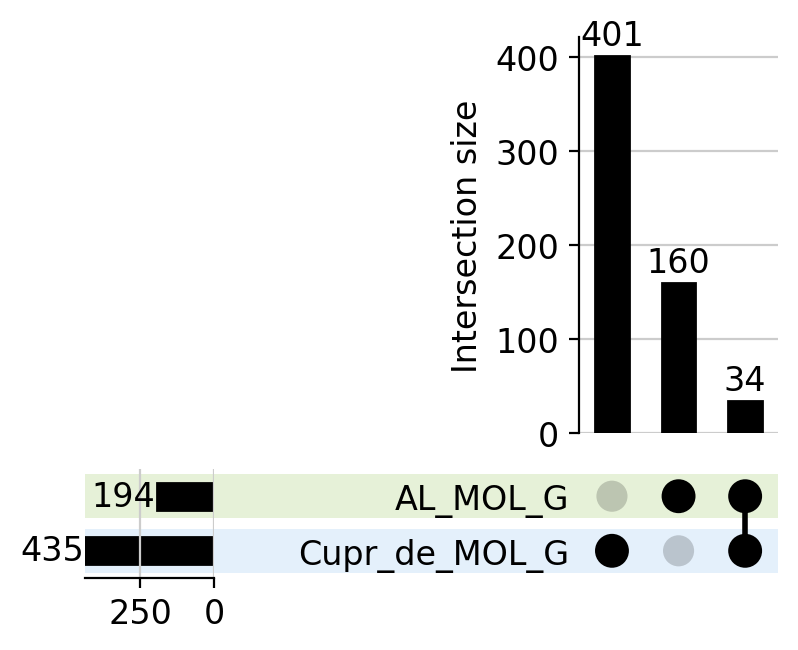

In [70]:
# Create UpSet plot
upset = UpSet(up_df_plot, subset_size='count', show_counts=True, facecolor="black", min_degree=1,
              min_subset_size=1)

# Style the subsets
upset.style_categories(
    'AL_MOL_G',
    shading_facecolor="#e6f1d8",
)

# Style the subsets
upset.style_categories(
    'Cupr_de_MOL_G',
    shading_facecolor="#e4f0fb",
)

# Plot the UpSet plot
upset.plot()
plt.suptitle("")

# Save the plot as PDF
plt.savefig('./figures/upset_plot_MOL_hs_mm_Cupr_overlap_up_n1.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [71]:
# Merge all the DataFrames hierarchically
up_df2 = MOL_AL_lpc_up_df.merge(
    LPC_de_up_df.merge(
        LPC_de2_up_df, on='Name', how='outer'
    ), on='Name', how='outer'
)

# Replace NaN with False
up_df2 = up_df2.fillna(False)

# Set index for the data frame
up_df2_plot = up_df2.set_index([
    'MOL_AL_lpc_up', 'LPC_de_up', 'LPC_de2_up'
])

# Print the merged DataFrame
print("Upregulated genes DataFrame:")
print(up_df2_plot)

Upregulated genes DataFrame:
                                       Name
MOL_AL_lpc_up LPC_de_up LPC_de2_up         
True          False     False          AACS
                        False          ABAT
False         True      True          ABCA5
True          False     False         ABCA6
False         True      True        ABHD17A
...                                     ...
              False     True         ZNF706
                        True         ZNF771
True          False     False        ZNF787
                        False          ZPR1
                        False        ZSWIM4

[725 rows x 1 columns]


/tmp/1211519.1.gpu/ipykernel_12015/3157873217.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  up_df2 = up_df2.fillna(False)


In [72]:
# Dictionary to map old index names to new index names
index_name_map = {
    'MOL_AL_lpc_up': 'AL_MOL_G',
    'LPC_de_up': 'LPC_de_MOL_F',
    'LPC_de2_up': 'LPC_de_MOL_E'
}

# Rename the index levels using the dictionary
up_df2_plot.index = up_df2_plot.index.rename(index_name_map)

print("Updated Upregulated genes DataFrame:")
print(up_df2_plot)

Updated Upregulated genes DataFrame:
                                       Name
AL_MOL_G LPC_de_MOL_F LPC_de_MOL_E         
True     False        False            AACS
                      False            ABAT
False    True         True            ABCA5
True     False        False           ABCA6
False    True         True          ABHD17A
...                                     ...
         False        True           ZNF706
                      True           ZNF771
True     False        False          ZNF787
                      False            ZPR1
                      False          ZSWIM4

[725 rows x 1 columns]


/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

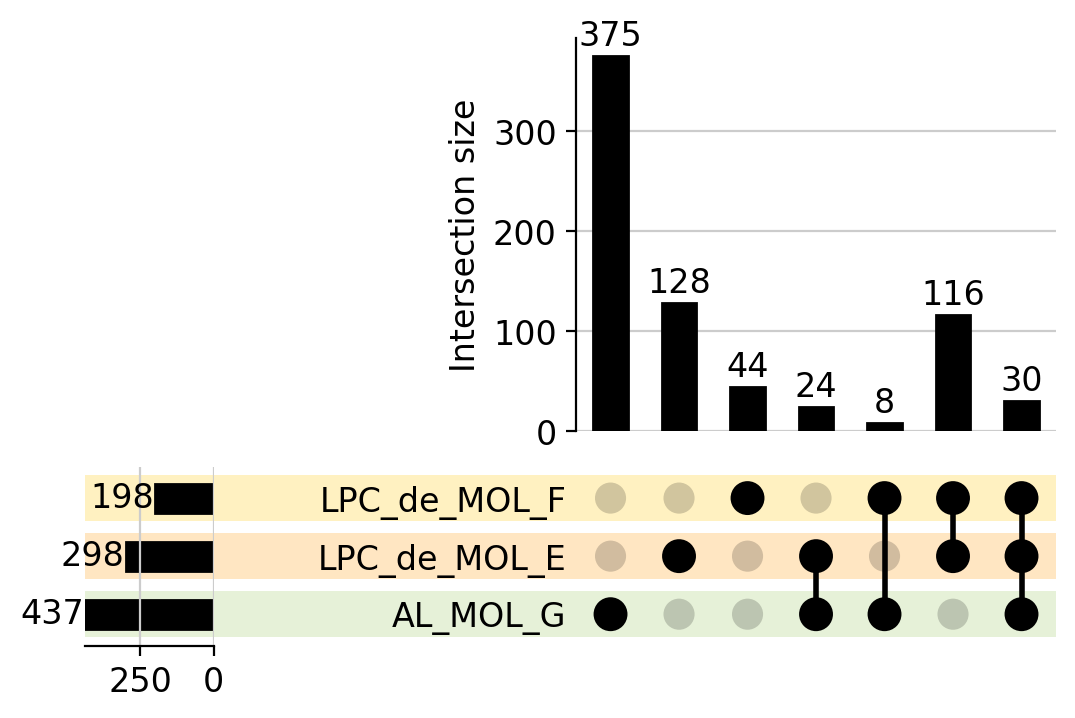

In [73]:
# Create UpSet plot
upset = UpSet(up_df2_plot, subset_size='count', show_counts=True, facecolor="black", min_degree=1,
              min_subset_size=1)

# Style the subsets
upset.style_categories(
    'AL_MOL_G',
    shading_facecolor="#e6f1d8",
)

# Style the subsets
upset.style_categories(
    'LPC_de_MOL_F',
    shading_facecolor="#fff1c1",
)

# Style the subsets
upset.style_categories(
    'LPC_de_MOL_E',
    shading_facecolor="#ffe6c2",
)

# Style the subsets
upset.style_categories(
    'LPC_re_MOL_E',
    shading_facecolor="#ffd28e",
)

# Plot the UpSet plot
upset.plot()
plt.suptitle("")

# Save the plot as PDF
plt.savefig('./figures/upset_plot_MOL_hs_mm_LPC_overlap_up_n1.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

## Find overlap gene sets

In [74]:
# Convert lists to sets for upregulated genes
set_MOL_AL_up_cupr = set(genes_MOL_AL_cupr_up)
set_MOL_AL_up_lpc = set(genes_MOL_AL_lpc_up)
set_LPC_de_F_up = set(genes_LPC_de_up)
set_LPC_de_E_up = set(genes_LPC_de2_up)
set_Cupr_de_up = set(genes_Cupr_de_up)

In [75]:
# Overlap of upregulated genes
overlap_cupr = set_Cupr_de_up & set_MOL_AL_up_cupr
print("Number of overlapping upregulated genes:", len(overlap_cupr))
print("Overlapping upregulated genes:", overlap_cupr)

Number of overlapping upregulated genes: 34
Overlapping upregulated genes: {'PTPN9', 'MCRIP1', 'CD44', 'LMNA', 'SPR', 'MAST2', 'IGF1R', 'UBALD2', 'CDKN1A', 'SNCA', 'MAFG', 'SESN3', 'MBD3', 'SPRY2', 'NUPR1', 'SPRED2', 'S100A6', 'FOS', 'MTHFD2', 'SLC3A2', 'ZMIZ1', 'RELL1', 'MTHFD1L', 'XYLT1', 'CHMP1A', 'PSMG4', 'TANC2', 'PIM3', 'ARHGDIA', 'SGF29', 'GALNT2', 'SLC7A5', 'SS18L2', 'ZCCHC10'}


In [76]:
subset_df = MOL_AL_up[MOL_AL_up['gene'].isin(overlap_cupr)]
subset_df = subset_df.sort_values(by='logFC', ascending=False)
subset_df

,gene,gene_hs,gene_mm,logFC,AveExpr,t,Pvalue,Padj,B
1285,FOS,FOS,Fos,4.296561,3.058252,-3.446722,1.753527e-03,0.014287,-2.401976
236,CD44,CD44,Cd44,3.753549,2.227048,-5.739882,4.229252e-06,0.000187,2.664543
1229,CDKN1A,CDKN1A,Cdkn1a,2.500327,1.595394,-3.542983,1.540516e-03,0.013134,-1.574898
1113,SLC7A5,SLC7A5,Slc7a5,2.323728,2.710615,-3.649709,1.074298e-03,0.010113,-1.745450
946,SPR,SPR,Spr,2.263916,1.636151,-3.868133,6.082852e-04,0.006736,-1.361838
143,SPRY2,SPRY2,Spry2,2.078921,3.612158,-6.258510,7.731478e-07,0.000056,3.981227
2021,S100A6,S100A6,S100a6,1.792850,3.051415,-2.828406,8.736548e-03,0.045312,-2.859926
1567,NUPR1,NUPR1,Nupr1,1.782753,2.602151,-3.203602,3.566078e-03,0.023850,-2.200182
673,RELL1,RELL1,Rell1,1.664355,3.518006,-4.427115,1.813175e-04,0.002817,-0.518397
1416,SESN3,SESN3,Sesn3,1.566304,4.135621,-3.334202,2.449636e-03,0.018129,-2.019535


In [77]:
sorted_genes = subset_df['gene_hs'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

FOS, CD44, CDKN1A, SLC7A5, SPR, SPRY2, S100A6, NUPR1, RELL1, SESN3, XYLT1, IGF1R, ZMIZ1, MTHFD2, UBALD2, SLC3A2, MBD3, TANC2, MTHFD1L, SPRED2, LMNA, PIM3, SGF29, PSMG4, SS18L2, ARHGDIA, PTPN9, CHMP1A, MAFG, MCRIP1, SNCA, GALNT2, MAST2, ZCCHC10


In [78]:
# Overlap of upregulated genes
overlap_lpc = set_LPC_de_F_up & set_LPC_de_E_up & set_MOL_AL_up_lpc
print("Number of overlapping upregulated genes:", len(overlap_lpc))
print("Overlapping upregulated genes:", overlap_lpc)

Number of overlapping upregulated genes: 30
Overlapping upregulated genes: {'ST3GAL1', 'COL27A1', 'LMNA', 'INPP4A', 'SNX10', 'TSPAN17', 'NRCAM', 'S100A6', 'APOE', 'BMP1', 'HPCAL1', 'ANXA2', 'TAPBP', 'LHFPL3', 'NAV2', 'DUSP15', 'ASAP2', 'CERK', 'PARP12', 'STAT1', 'STAT3', 'CARD19', 'CRTAC1', 'CSMD2', 'SYNE2', 'PROS1', 'SPSB1', 'CEBPD', 'GNB4', 'CSF1'}


In [79]:
subset_df = MOL_AL_up[MOL_AL_up['gene'].isin(overlap_lpc)]
subset_df = subset_df.sort_values(by='logFC', ascending=False)
subset_df

,gene,gene_hs,gene_mm,logFC,AveExpr,t,Pvalue,Padj,B
71,ANXA2,ANXA2,Anxa2,5.346736,2.113728,-7.432187,5.560261e-08,0.000008,1.977122
234,SNX10,SNX10,Snx10,3.703347,1.865304,-6.189738,4.178215e-06,0.000186,3.107509
620,APOE,APOE,Apoe,3.587914,0.976186,-4.414567,1.368376e-04,0.002310,0.395225
43,PROS1,PROS1,Pros1,3.385448,3.251639,-7.823989,1.178115e-08,0.000003,5.700676
1109,CEBPD,CEBPD,Cebpd,3.163491,2.136612,-3.640687,1.052115e-03,0.009940,-1.162969
358,COL27A1,COL27A1,Col27a1,3.063520,1.724955,-5.087364,2.117090e-05,0.000618,0.720348
1051,NRCAM,NRCAM,Nrcam,2.850944,2.344526,-3.725222,8.673992e-04,0.008647,-1.270940
152,NAV2,NAV2,Nav2,2.136208,9.166172,-6.250489,9.021821e-07,0.000062,2.030930
129,ST3GAL1,ST3GAL1,St3gal1,2.029748,4.295866,-6.098174,6.384698e-07,0.000052,5.932138
165,CRTAC1,CRTAC1,Crtac1,1.980560,2.581798,-5.913172,1.110029e-06,0.000070,5.394630


In [80]:
sorted_genes = subset_df['gene_hs'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

ANXA2, SNX10, APOE, PROS1, CEBPD, COL27A1, NRCAM, NAV2, ST3GAL1, CRTAC1, S100A6, PARP12, CSF1, LHFPL3, DUSP15, ASAP2, GNB4, SYNE2, CSMD2, LMNA, HPCAL1, STAT3, TSPAN17, CARD19, STAT1, CERK, SPSB1, BMP1, INPP4A, TAPBP


In [121]:
# Overlap of upregulated genes
overlap_lpc_E = set_LPC_de_E_up & set_MOL_AL_up_lpc - set_LPC_de_F_up
print("Number of overlapping upregulated genes:", len(overlap_lpc_E))
print("Overlapping upregulated genes:", overlap_lpc_E)

Number of overlapping upregulated genes: 24
Overlapping upregulated genes: {'MCRIP1', 'CORO2B', 'CMIP', 'TUBB2A', 'JDP2', 'C11orf96', 'TSPAN9', 'MFGE8', 'ADAM9', 'CDKN1A', 'VAT1', 'AFF3', 'SPRY2', 'HERC6', 'FAR2', 'KIFC3', 'SEMA5A', 'LAMC1', 'EYA4', 'EFR3B', 'ZC3HAV1', 'SS18L2', 'FGFR1', 'TOP1MT'}


In [124]:
subset_df = MOL_AL_up[MOL_AL_up['gene'].isin(overlap_lpc_E)]
subset_df = subset_df.sort_values(by='logFC', ascending=True)
print(subset_df[:5])

sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

        gene gene_hs gene_mm     logFC   AveExpr         t    Pvalue  \
323     CMIP    CMIP    Cmip  0.726919  6.277417 -5.048380  0.000015   
478   MCRIP1  MCRIP1  Mcrip1  0.740832  5.288265 -4.634870  0.000051   
626   TOP1MT  TOP1MT  Top1mt  0.852720  3.202182 -4.286579  0.000141   
780    ADAM9   ADAM9   Adam9  0.886569  5.759783 -4.386652  0.000303   
2073    EYA4    EYA4    Eya4  0.906344  6.161434 -2.836896  0.009454   

          Padj         B  
323   0.000479  2.876661  
478   0.001110  1.687893  
626   0.002359  0.716544  
780   0.004070  0.909747  
2073  0.047788 -2.902376  
CMIP, MCRIP1, TOP1MT, ADAM9, EYA4, SS18L2, CORO2B, KIFC3, VAT1, HERC6, TSPAN9, SEMA5A, EFR3B, TUBB2A, C11orf96, SPRY2, AFF3, FGFR1, ZC3HAV1, MFGE8, CDKN1A, FAR2, LAMC1, JDP2


In [122]:
# Overlap of upregulated genes
overlap_lpc_F = set_LPC_de_F_up & set_MOL_AL_up_lpc - set_LPC_de_E_up
print("Number of overlapping upregulated genes:", len(overlap_lpc_F))
print("Overlapping upregulated genes:", overlap_lpc_F)

Number of overlapping upregulated genes: 8
Overlapping upregulated genes: {'FRMD8', 'PLAT', 'ABLIM2', 'FOS', 'SORD', 'PTPN13', 'TENT5A', 'HSPBP1'}


In [125]:
subset_df = MOL_AL_up[MOL_AL_up['gene'].isin(overlap_lpc_F)]
subset_df = subset_df.sort_values(by='logFC', ascending=True)
print(subset_df[:5])

sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

        gene gene_hs gene_mm     logFC   AveExpr         t        Pvalue  \
1808  ABLIM2  ABLIM2  Ablim2  0.632968  5.105549 -3.063072  5.948706e-03   
747     SORD    SORD    Sord  0.704238  4.470749 -4.064908  2.681777e-04   
1013  HSPBP1  HSPBP1  Hspbp1  0.756284  3.585858 -3.863708  7.703854e-04   
127    FRMD8   FRMD8   Frmd8  1.330550  5.243250 -6.786450  6.170041e-07   
298   PTPN13  PTPN13  Ptpn13  1.394442  9.214342 -5.327654  1.057123e-05   

          Padj         B  
1808  0.034485 -2.505269  
747   0.003760  0.089378  
1013  0.007967 -0.487733  
127   0.000050  5.028552  
298   0.000371  0.965076  
ABLIM2, SORD, HSPBP1, FRMD8, PTPN13, TENT5A, PLAT, FOS


In [158]:
# Overlap of upregulated genes
overlap_shared_all = overlap_cupr & overlap_lpc
print("Number of overlapping upregulated genes:", len(overlap_shared_all))
print("Overlapping upregulated genes:", overlap_shared_all)

Number of overlapping upregulated genes: 2
Overlapping upregulated genes: {'LMNA', 'S100A6'}


In [159]:
# Overlap of upregulated genes
overlap_shared_1LPC = overlap_cupr & (overlap_lpc_E | overlap_lpc_F)
print("Number of overlapping upregulated genes:", len(overlap_shared_1LPC))
print("Overlapping upregulated genes:", overlap_shared_1LPC)

Number of overlapping upregulated genes: 5
Overlapping upregulated genes: {'SS18L2', 'FOS', 'CDKN1A', 'SPRY2', 'MCRIP1'}


## DOWN

In [81]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene'].isin(genes_all_cupr)]

# Apply filtering to each DEG DataFrame
MOL_AL_down_cupr = filter_genes(MOL_AL_down)

print(MOL_AL_down_cupr.shape)

(216, 9)


In [82]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene'].isin(genes_all_lpc)]

# Apply filtering to each DEG DataFrame
MOL_AL_down_lpc = filter_genes(MOL_AL_down)

print(MOL_AL_down_lpc.shape)

(300, 9)


In [83]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene_hs'].isin(genes_all_cupr)]

# Apply filtering to each DEG DataFrame
Cupr_de_down = filter_genes(Cupr_de_down)
print(Cupr_de_down.shape)

(676, 9)


In [84]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene_hs'].isin(genes_all_lpc)]

# Apply filtering to each DEG DataFrame
LPC_de_F_down = filter_genes(LPC_de_F_down)
LPC_de_E_down = filter_genes(LPC_de_E_down)
#LPC_re_E_down = filter_genes(LPC_re_E_down)

print(LPC_de_F_down.shape)
print(LPC_de_E_down.shape)
#print(LPC_re_E_down.shape)

(333, 9)
(388, 9)


In [85]:
# Create gene lists from the dfs:
genes_MOL_AL_down_cupr = MOL_AL_down_cupr['gene'].tolist()
genes_MOL_AL_down_lpc = MOL_AL_down_lpc['gene'].tolist()

# Define the function to create a DataFrame
def create_gene_df(genes_list, column_name):
    return pd.DataFrame(genes_list, columns=[column_name])

# Create DataFrames for each gene list
MOL_AL_down_cupr_df = create_gene_df(genes_MOL_AL_down_cupr, 'MOL_AL_down_cupr')
MOL_AL_down_lpc_df = create_gene_df(genes_MOL_AL_down_lpc, 'MOL_AL_down_lpc')

# Create DataFrames for each gene list using the new gene lists
MOL_AL_down_cupr_df = pd.DataFrame({'MOL_AL_down_cupr': True, 'Name': genes_MOL_AL_down_cupr})
MOL_AL_down_lpc_df = pd.DataFrame({'MOL_AL_down_lpc': True, 'Name': genes_MOL_AL_down_lpc})

In [86]:
# Create gene lists from the dfs:
genes_LPC_de_down = LPC_de_F_down['gene_hs'].tolist()
genes_LPC_de2_down = LPC_de_E_down['gene_hs'].tolist()
genes_Cupr_de_down = Cupr_de_down['gene_hs'].tolist()

# Define the function to create a DataFrame
def create_gene_df(genes_list, column_name):
    return pd.DataFrame(genes_list, columns=[column_name])

# Create DataFrames for each gene list
LPC_de_down_df = create_gene_df(genes_LPC_de_down, 'LPC_de_down')
LPC_de2_down_df = create_gene_df(genes_LPC_de2_down, 'LPC_de2_down')
Cupr_de_down_df = create_gene_df(genes_Cupr_de_down, 'Cupr_de_down')

# Create DataFrames for each gene list using the new gene lists
LPC_de_down_df = pd.DataFrame({'LPC_de_down': True, 'Name': genes_LPC_de_down})
LPC_de2_down_df = pd.DataFrame({'LPC_de2_down': True, 'Name': genes_LPC_de2_down})
Cupr_de_down_df = pd.DataFrame({'Cupr_de_down': True, 'Name': genes_Cupr_de_down})

In [87]:
# Merge all the DataFrames hierarchically
down_df = MOL_AL_down_cupr_df.merge(
    MOL_AL_down_lpc_df.merge(
        LPC_de_down_df.merge(
            LPC_de2_down_df.merge(
                Cupr_de_down_df, on='Name', how='outer'
            ), on='Name', how='outer'
        ), on='Name', how='outer'
    ), on='Name', how='outer'
)

# Replace NaN with False
down_df = down_df.fillna(False)

# Set index for the data frame
down_df_plot = down_df.set_index([
    'MOL_AL_down_cupr', 'MOL_AL_down_lpc', 'LPC_de_down', 'LPC_de2_down', 'Cupr_de_down'
])

# Print the merged DataFrame
print("Downreg genes DataFrame:")
print(down_df_plot)

Downreg genes DataFrame:
                                                                          Name
MOL_AL_down_cupr MOL_AL_down_lpc LPC_de_down LPC_de2_down Cupr_de_down        
False            False           False       False        True            AATK
                                                          True           ABCA2
                                 True        False        False          ABCA7
                                 False       False        True           ABCA8
                                 True        False        False         ABCB10
...                                                                        ...
                                 False       False        True          ZNF638
                                             True         False         ZNF692
                 True            False       False        False         ZNF883
True             True            False       False        False         ZRANB2
False            False     

/tmp/1211519.1.gpu/ipykernel_12015/741715553.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  down_df = down_df.fillna(False)


In [88]:
# Dictionary to map old index names to new index names
index_name_map = {
    'MOL_AL_down_cupr': 'AL_MOL_G_cupr',
    'MOL_AL_down_lpc': 'AL_MOL_G_lpc',
    'LPC_de_down': 'LPC_de_MOL_F',
    'LPC_de2_down': 'LPC_de_MOL_E',
    'Cupr_de_down': 'Cupr_de_MOL_G'
}

# Rename the index levels using the dictionary
down_df_plot.index = down_df_plot.index.rename(index_name_map)

print("Updated Downregulated genes DataFrame:")
print(down_df_plot)

Updated Downregulated genes DataFrame:
                                                                      Name
AL_MOL_G_cupr AL_MOL_G_lpc LPC_de_MOL_F LPC_de_MOL_E Cupr_de_MOL_G        
False         False        False        False        True             AATK
                                                     True            ABCA2
                           True         False        False           ABCA7
                           False        False        True            ABCA8
                           True         False        False          ABCB10
...                                                                    ...
                           False        False        True           ZNF638
                                        True         False          ZNF692
              True         False        False        False          ZNF883
True          True         False        False        False          ZRANB2
False         False        False        False        True    

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

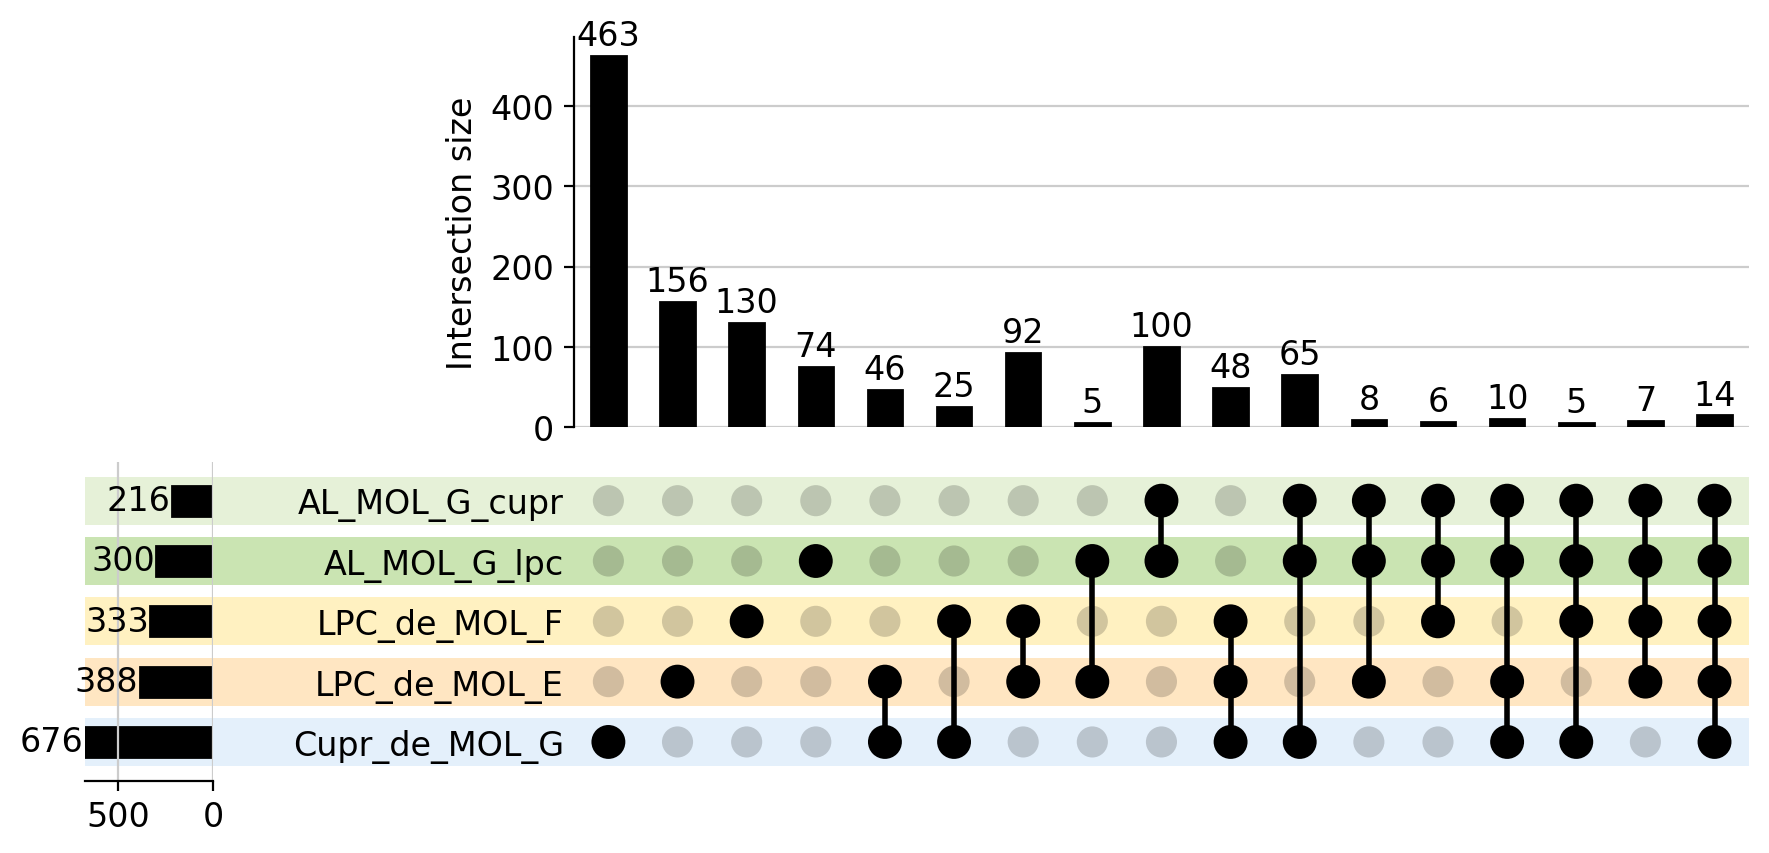

In [89]:
# Create UpSet plot
upset = UpSet(down_df_plot, subset_size='count', show_counts=True, facecolor="black", min_degree=1,
              min_subset_size=5)

# Style the subsets
upset.style_categories(
    'AL_MOL_G_cupr',
    shading_facecolor="#e6f1d8",
)

# Style the subsets
upset.style_categories(
    'AL_MOL_G_lpc',
    shading_facecolor="#cae4b2",
)

# Style the subsets
upset.style_categories(
    'LPC_de_MOL_F',
    shading_facecolor="#fff1c1",
)

# Style the subsets
upset.style_categories(
    'LPC_de_MOL_E',
    shading_facecolor="#ffe6c2",
)

# Style the subsets
upset.style_categories(
    'Cupr_de_MOL_G',
    shading_facecolor="#e4f0fb",
)

# Plot the UpSet plot
upset.plot()
plt.suptitle("")

# Save the plot as PDF
#plt.savefig('./figures/upset_plot_MOL_hs_mm_down_n5.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [90]:
# Merge all the DataFrames hierarchically
down_df = MOL_AL_down_cupr_df.merge(
        Cupr_de_down_df, on='Name', how='outer'
)

# Replace NaN with False
down_df = down_df.fillna(False)

# Set index for the data frame
down_df_plot = down_df.set_index([
    'MOL_AL_down_cupr', 'Cupr_de_down'
])

# Print the merged DataFrame
print("Downreg genes DataFrame:")
print(down_df_plot)

Downreg genes DataFrame:
                                 Name
MOL_AL_down_cupr Cupr_de_down        
False            True            AATK
                 True           ABCA2
                 True           ABCA8
                 True           ABCB8
                 True           ABCC5
...                               ...
                 True          ZNF536
                 True          ZNF608
                 True          ZNF638
True             False         ZRANB2
False            True           ZZEF1

[798 rows x 1 columns]


/tmp/1211519.1.gpu/ipykernel_12015/3125220178.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  down_df = down_df.fillna(False)


In [91]:
# Dictionary to map old index names to new index names
index_name_map = {
    'MOL_AL_down_cupr': 'AL_MOL_G',
    'Cupr_de_down': 'Cupr_de_MOL_G',
}

# Rename the index levels using the dictionary
down_df_plot.index = down_df_plot.index.rename(index_name_map)

print("Updated Downregulated genes DataFrame:")
print(down_df_plot)

Updated Downregulated genes DataFrame:
                          Name
AL_MOL_G Cupr_de_MOL_G        
False    True             AATK
         True            ABCA2
         True            ABCA8
         True            ABCB8
         True            ABCC5
...                        ...
         True           ZNF536
         True           ZNF608
         True           ZNF638
True     False          ZRANB2
False    True            ZZEF1

[798 rows x 1 columns]


/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

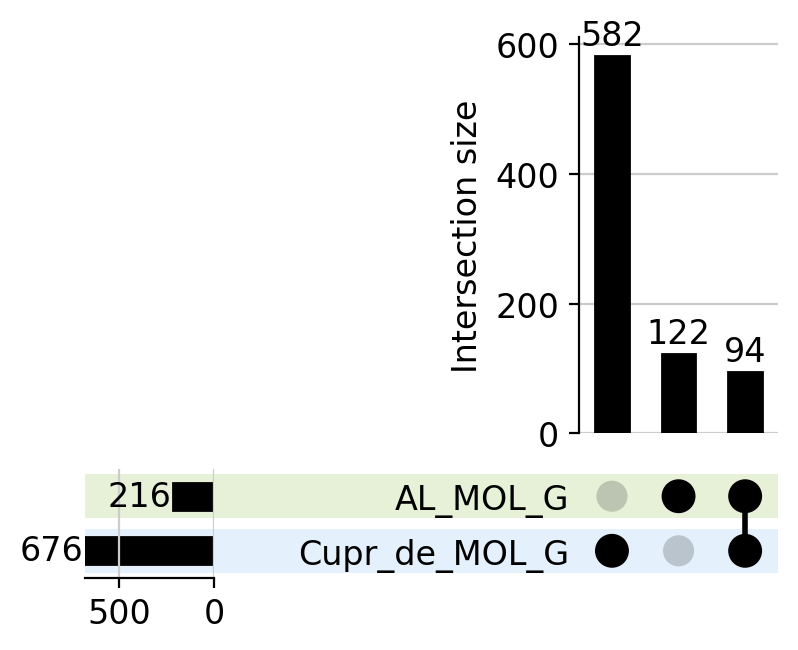

In [92]:
# Create UpSet plot
upset = UpSet(down_df_plot, subset_size='count', show_counts=True, facecolor="black", min_degree=1,
              min_subset_size=1)

# Style the subsets
upset.style_categories(
    'AL_MOL_G',
    shading_facecolor="#e6f1d8",
)

# Style the subsets
upset.style_categories(
    'Cupr_de_MOL_G',
    shading_facecolor="#e4f0fb",
)

# Plot the UpSet plot
upset.plot()
plt.suptitle("")

# Save the plot as PDF
plt.savefig('./figures/upset_plot_MOL_hs_mm_Cupr_overlap_down_n1.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [93]:
# Merge all the DataFrames hierarchically
down_df2 = MOL_AL_down_lpc_df.merge(
    LPC_de_down_df.merge(
        LPC_de2_down_df, on='Name', how='outer'
    ), on='Name', how='outer'
)

# Replace NaN with False
down_df2 = down_df2.fillna(False)

# Set index for the data frame
down_df2_plot = down_df2.set_index([
    'MOL_AL_down_lpc', 'LPC_de_down', 'LPC_de2_down'
])

# Print the merged DataFrame
print("Downreg genes DataFrame:")
print(down_df2_plot)

Downreg genes DataFrame:
                                             Name
MOL_AL_down_lpc LPC_de_down LPC_de2_down         
False           True        False           ABCA7
                            False          ABCB10
                            False          ABHD12
True            True        True          ABHD17B
                False       False           ABHD6
...                                           ...
False           True        True           ZNF462
                            False          ZNF532
                False       True           ZNF692
True            False       False          ZNF883
                            False          ZRANB2

[797 rows x 1 columns]


/tmp/1211519.1.gpu/ipykernel_12015/332226622.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  down_df2 = down_df2.fillna(False)


In [94]:
# Dictionary to map old index names to new index names
index_name_map = {
    'MOL_AL_down_lpc': 'AL_MOL_G',
    'LPC_de_down': 'LPC_de_MOL_F',
    'LPC_de2_down': 'LPC_de_MOL_E',
}

# Rename the index levels using the dictionary
down_df2_plot.index = down_df2_plot.index.rename(index_name_map)

print("Updated Downregulated genes DataFrame:")
print(down_df2_plot)

Updated Downregulated genes DataFrame:
                                       Name
AL_MOL_G LPC_de_MOL_F LPC_de_MOL_E         
False    True         False           ABCA7
                      False          ABCB10
                      False          ABHD12
True     True         True          ABHD17B
         False        False           ABHD6
...                                     ...
False    True         True           ZNF462
                      False          ZNF532
         False        True           ZNF692
True     False        False          ZNF883
                      False          ZRANB2

[797 rows x 1 columns]


/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

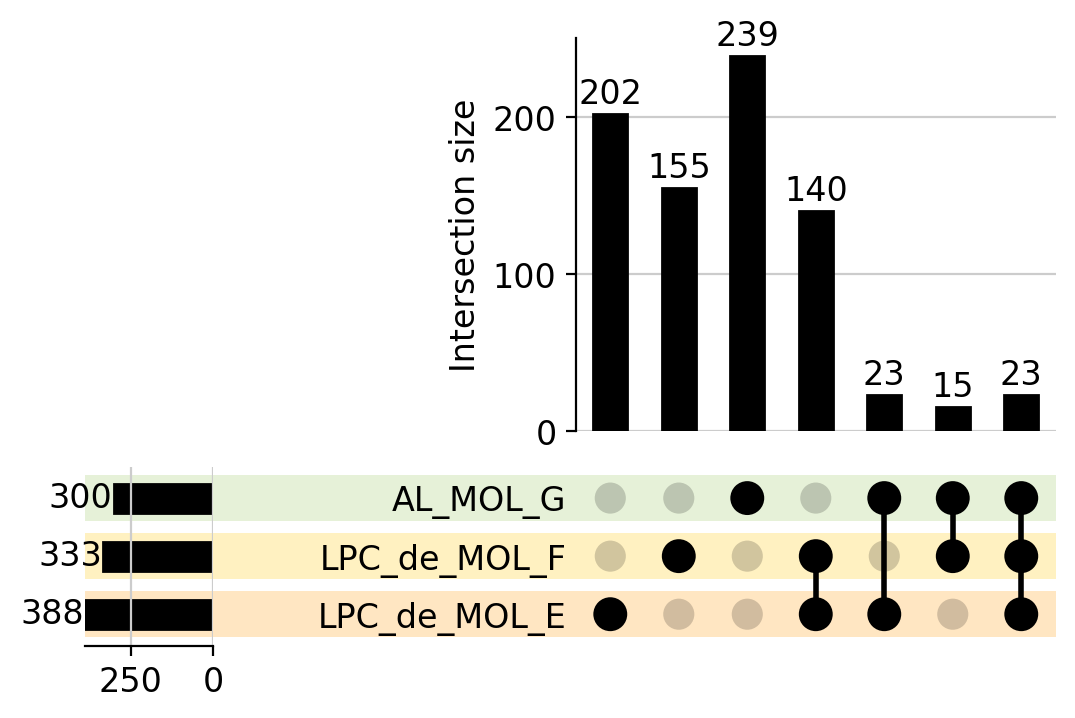

In [95]:
# Create UpSet plot
upset = UpSet(down_df2_plot, subset_size='count', show_counts=True, facecolor="black", min_degree=1,
              min_subset_size=1)

# Style the subsets
upset.style_categories(
    'AL_MOL_G',
    shading_facecolor="#e6f1d8",
)

# Style the subsets
upset.style_categories(
    'LPC_de_MOL_F',
    shading_facecolor="#fff1c1",
)

# Style the subsets
upset.style_categories(
    'LPC_de_MOL_E',
    shading_facecolor="#ffe6c2",
)

# Plot the UpSet plot
upset.plot()
plt.suptitle("")

# Save the plot as PDF
plt.savefig('./figures/upset_plot_MOL_hs_mm_LPC_overlap_down_n1.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [96]:
# Convert lists to sets for upregulated genes
set_MOL_AL_down_cupr = set(genes_MOL_AL_down_cupr)
set_MOL_AL_down_lpc = set(genes_MOL_AL_down_lpc)
set_LPC_de_F_down = set(genes_LPC_de_down)
set_LPC_de_E_down = set(genes_LPC_de2_down)
set_Cupr_de_down = set(genes_Cupr_de_down)

In [97]:
# Overlap of upregulated genes
overlap_cupr_down = set_MOL_AL_down_cupr & set_Cupr_de_down
print("Number of overlapping upregulated genes:", len(overlap_cupr_down))
print("Overlapping upregulated genes:", overlap_cupr_down)

Number of overlapping upregulated genes: 94
Overlapping upregulated genes: {'TESK2', 'ADI1', 'ABHD17B', 'ANO4', 'TRIM59', 'SEMA4D', 'PADI2', 'PPP2R3A', 'RHOU', 'PPP1R14A', 'ANKIB1', 'PON2', 'GRM7', 'TMEM178B', 'NRBP2', 'LDLRAD4', 'ATG4C', 'RNF13', 'PRKCQ', 'TRIM2', 'ASPA', 'EXOC6B', 'USP30', 'UNC5C', 'APBB2', 'VLDLR', 'ATG10', 'ADAMTS4', 'MGAT5', 'NLK', 'STMN4', 'FNBP1', 'GRHPR', 'LGI3', 'RHOB', 'CA14', 'MDGA2', 'SEMA6D', 'SEMA6A', 'CAVIN4', 'DUSP16', 'PLEKHG3', 'SCG5', 'GAS7', 'MAST3', 'PAK1', 'DLG1', 'PLXDC2', 'LIPA', 'GPR62', 'OMG', 'FBXO21', 'ZDHHC9', 'CLASP2', 'DOCK3', 'TMEFF2', 'PDE8A', 'TJAP1', 'PPP1R16B', 'MAL', 'GAMT', 'CCP110', 'AUTS2', 'LUC7L2', 'TTLL7', 'RCBTB1', 'ACSS2', 'CTNNA3', 'SNX32', 'ENPP2', 'TPPP3', 'NAALADL2', 'PLLP', 'ERBB3', 'IGSF8', 'STRN', 'HHIP', 'LAMA2', 'ZEB2', 'OPALIN', 'CMTM5', 'PRR18', 'ANK3', 'SHISA4', 'HECW2', 'MOBP', 'SGK2', 'GALNT6', 'LPAR1', 'LPGAT1', 'SH3GL3', 'PSD3', 'MOG', 'KAZN'}


In [98]:
'GAMT' in overlap_cupr_down

True

In [99]:
'OPALIN' in overlap_cupr_down

True

In [100]:
subset_df = MOL_AL_down[MOL_AL_down['gene'].isin(overlap_cupr_down)]
subset_df = subset_df.sort_values(by='logFC', ascending=True)
subset_df[:5]

,gene,gene_hs,gene_mm,logFC,AveExpr,t,Pvalue,Padj,B
1,OPALIN,OPALIN,Opalin,-3.605888,6.701410,12.501880,7.294486e-14,3.824864e-10,13.909813
263,TMEM178B,TMEM178B,Tmem178b,-2.749747,4.057778,5.339619,6.193903e-06,2.460434e-04,3.826877
18,SEMA6D,SEMA6D,Sema6d,-2.207062,6.269713,8.589050,9.576516e-10,5.261274e-07,8.464111
915,GRM7,GRM7,Grm7,-2.140811,3.365906,3.902951,5.408551e-04,6.182412e-03,-0.951409
868,MDGA2,MDGA2,Mdga2,-2.076277,5.510421,3.950161,4.447217e-04,5.366855e-03,-0.864249


In [101]:
sorted_genes = subset_df['gene_hs'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

OPALIN, TMEM178B, SEMA6D, GRM7, MDGA2, TPPP3, CA14, LAMA2, STMN4, PRR18, GALNT6, ANK3, CMTM5, PLXDC2, ASPA, RCBTB1, SGK2, PRKCQ, TRIM59, PPP1R14A, OMG, PLEKHG3, HHIP, PLLP, CAVIN4, LPGAT1, TTLL7, PAK1, TESK2, MOG, RHOB, HECW2, SH3GL3, TMEFF2, GPR62, MAL, NAALADL2, VLDLR, SCG5, ATG4C, ADAMTS4, ZDHHC9, LIPA, GAMT, PDE8A, FNBP1, IGSF8, ATG10, LUC7L2, MOBP, ACSS2, LPAR1, SEMA6A, ERBB3, ANO4, PSD3, SHISA4, LDLRAD4, KAZN, ABHD17B, ANKIB1, NLK, ENPP2, SNX32, UNC5C, FBXO21, ZEB2, RHOU, DOCK3, RNF13, TJAP1, CCP110, DUSP16, STRN, ADI1, CLASP2, EXOC6B, MAST3, CTNNA3, TRIM2, PADI2, GRHPR, PON2, NRBP2, PPP1R16B, USP30, GAS7, SEMA4D, APBB2, MGAT5, LGI3, DLG1, AUTS2, PPP2R3A


In [102]:
# Overlap of upregulated genes
overlap_lpc_down = set_MOL_AL_down_lpc & set_LPC_de_F_down & set_LPC_de_E_down
print("Number of overlapping upregulated genes:", len(overlap_lpc_down))
print("Overlapping upregulated genes:", overlap_lpc_down)

Number of overlapping upregulated genes: 23
Overlapping upregulated genes: {'LUC7L2', 'CAVIN4', 'ATG4C', 'RCN2', 'CTNNA3', 'C21orf91', 'ABHD17B', 'KCTD4', 'PLXDC2', 'USP30', 'P2RX7', 'APBB2', 'FBXO7', 'HHIP', 'TRIM59', 'LAMA2', 'UNC5B', 'SLC6A1', 'HECW2', 'FNBP1', 'LSAMP', 'DAAM2', 'MDGA2'}


In [103]:
subset_df = MOL_AL_down[MOL_AL_down['gene'].isin(overlap_lpc_down)]
subset_df = subset_df.sort_values(by='logFC', ascending=True)
print(subset_df[:5])

sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

       gene gene_hs gene_mm     logFC   AveExpr         t        Pvalue  \
868   MDGA2   MDGA2   Mdga2 -2.076277  5.510421  3.950161  4.447217e-04   
81    LAMA2   LAMA2   Lama2 -1.841942  8.204385  7.239835  1.198297e-07   
54   SLC6A1  SLC6A1  Slc6a1 -1.495059  6.738720  7.206249  2.429476e-08   
966   KCTD4   KCTD4   Kctd4 -1.427172  3.155081  3.796563  6.614271e-04   
169  PLXDC2  PLXDC2  Plxdc2 -1.395717  9.386710  5.903561  1.142424e-06   

         Padj         B  
868  0.005367 -0.864249  
81   0.000015  4.561603  
54   0.000005  9.149666  
966  0.007173 -0.649251  
169  0.000070  5.383885  
MDGA2, LAMA2, SLC6A1, KCTD4, PLXDC2, TRIM59, HHIP, CAVIN4, HECW2, UNC5B, ATG4C, FBXO7, FNBP1, LUC7L2, P2RX7, ABHD17B, LSAMP, DAAM2, RCN2, CTNNA3, C21orf91, USP30, APBB2


In [104]:
# Overlap of upregulated genes
overlap_down_shared_all = overlap_cupr_down & overlap_lpc_down
print("Number of overlapping upregulated genes:", len(overlap_down_shared_all))
print("Overlapping upregulated genes:", overlap_down_shared_all)

Number of overlapping upregulated genes: 14
Overlapping upregulated genes: {'LUC7L2', 'HECW2', 'CAVIN4', 'PLXDC2', 'USP30', 'LAMA2', 'FNBP1', 'APBB2', 'ATG4C', 'CTNNA3', 'HHIP', 'TRIM59', 'MDGA2', 'ABHD17B'}


In [105]:
# Overlap of upregulated genes
overlap_lpc_down_E = set_MOL_AL_down_lpc & set_LPC_de_E_down - set_LPC_de_F_down
print("Number of overlapping upregulated genes:", len(overlap_lpc_down_E))
print("Overlapping upregulated genes:", overlap_lpc_down_E)

Number of overlapping upregulated genes: 23
Overlapping upregulated genes: {'TTLL7', 'PRKCQ', 'INPP1', 'TMEM132B', 'PLEKHG3', 'ADI1', 'FAM171B', 'EXOC6B', 'KCTD16', 'BCHE', 'CLASP2', 'TMEM144', 'DOCK3', 'PURG', 'CACNA1C', 'MRTFB', 'PPP2R3A', 'ERBB4', 'SLC16A1', 'CDC42SE2', 'PON2', 'DAPK2', 'SEMA6A'}


In [106]:
# Overlap of upregulated genes
overlap_lpc_down_F = set_MOL_AL_down_lpc & set_LPC_de_F_down - set_LPC_de_E_down
print("Number of overlapping upregulated genes:", len(overlap_lpc_down_F))
print("Overlapping upregulated genes:", overlap_lpc_down_F)

Number of overlapping upregulated genes: 15
Overlapping upregulated genes: {'CTNND2', 'RHBDL2', 'MEIS1', 'PDCD4', 'PDE4D', 'PPFIA2', 'DIPK2A', 'OMG', 'ACSS2', 'LPAR1', 'SCG5', 'EPM2A', 'MAST3', 'DEPDC7', 'ACSL3'}


In [107]:
# Overlap of upregulated genes
overlap_lpc_down_other = (overlap_lpc_down_F | overlap_lpc_down_E)
print("Number of overlapping upregulated genes:", len(overlap_lpc_down_other))
print("Overlapping upregulated genes:", overlap_lpc_down_other)

Number of overlapping upregulated genes: 38
Overlapping upregulated genes: {'TTLL7', 'PRKCQ', 'ACSS2', 'INPP1', 'TMEM132B', 'PLEKHG3', 'SCG5', 'MAST3', 'ADI1', 'FAM171B', 'EXOC6B', 'KCTD16', 'BCHE', 'PDE4D', 'OMG', 'EPM2A', 'CLASP2', 'TMEM144', 'DOCK3', 'PURG', 'CACNA1C', 'MRTFB', 'PPP2R3A', 'CTNND2', 'RHBDL2', 'ERBB4', 'PDCD4', 'PPFIA2', 'DIPK2A', 'SEMA6A', 'DEPDC7', 'SLC16A1', 'CDC42SE2', 'PON2', 'DAPK2', 'LPAR1', 'ACSL3', 'MEIS1'}


In [108]:
subset_df = MOL_AL_down[MOL_AL_down['gene'].isin(overlap_lpc_down_other)]
subset_df = subset_df.sort_values(by='logFC', ascending=True)
print(subset_df[:5])

sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

          gene   gene_hs   gene_mm     logFC   AveExpr         t  \
68    TMEM132B  TMEM132B  Tmem132b -4.204333  3.570902  6.995350   
230    SLC16A1   SLC16A1   Slc16a1 -2.010070  4.091172  5.719046   
1588   CACNA1C   CACNA1C   Cacna1c -1.896235  3.167993  3.167270   
47      CTNND2    CTNND2    Ctnnd2 -1.641409  8.924479  7.757751   
720       BCHE      BCHE      Bche -1.393160  3.648444  4.206923   

            Pvalue      Padj         B  
68    4.500053e-08  0.000007  7.056825  
230   3.956849e-06  0.000180  3.204407  
1588  3.782582e-03  0.024961 -2.248215  
47    1.563021e-08  0.000003  7.974973  
720   2.345748e-04  0.003412 -0.169470  
TMEM132B, SLC16A1, CACNA1C, CTNND2, BCHE, PPFIA2, KCTD16, PRKCQ, OMG, PLEKHG3, TTLL7, MRTFB, SCG5, INPP1, PURG, PDCD4, PDE4D, ERBB4, ACSS2, MEIS1, LPAR1, SEMA6A, DEPDC7, FAM171B, DOCK3, ADI1, CLASP2, EXOC6B, CDC42SE2, MAST3, ACSL3, DAPK2, PON2, RHBDL2, DIPK2A, EPM2A, TMEM144, PPP2R3A


In [ ]:
# Convert lists to sets for upregulated genes
set_MOL_AL_down_cupr = set(genes_MOL_AL_down_cupr)
set_MOL_AL_down_lpc = set(genes_MOL_AL_down_lpc)
set_LPC_de_F_down = set(genes_LPC_de_down)
set_LPC_de_E_down = set(genes_LPC_de2_down)
set_Cupr_de_down = set(genes_Cupr_de_down)

In [112]:
# Overlap of upregulated genes
overlap_lpc_cupr_down = (set_LPC_de_F_down & set_LPC_de_E_down & set_Cupr_de_down & (set_MOL_AL_down_cupr |set_MOL_AL_down_lpc))
print("Number of overlapping upregulated genes:", len(overlap_lpc_cupr_down))
print("Overlapping upregulated genes:", overlap_lpc_cupr_down)

Number of overlapping upregulated genes: 14
Overlapping upregulated genes: {'LUC7L2', 'HECW2', 'CAVIN4', 'PLXDC2', 'USP30', 'LAMA2', 'FNBP1', 'APBB2', 'ATG4C', 'CTNNA3', 'HHIP', 'TRIM59', 'MDGA2', 'ABHD17B'}


In [114]:
# Overlap of upregulated genes
overlap_lpc_cupr_down = (set_LPC_de_F_down & set_LPC_de_E_down & set_MOL_AL_down_lpc) & (set_Cupr_de_down & set_MOL_AL_down_cupr)
print("Number of overlapping upregulated genes:", len(overlap_lpc_cupr_down))
print("Overlapping upregulated genes:", overlap_lpc_cupr_down)

Number of overlapping upregulated genes: 14
Overlapping upregulated genes: {'LUC7L2', 'HECW2', 'CAVIN4', 'PLXDC2', 'USP30', 'LAMA2', 'FNBP1', 'APBB2', 'ATG4C', 'CTNNA3', 'HHIP', 'TRIM59', 'MDGA2', 'ABHD17B'}


In [115]:
subset_df = MOL_AL_down[MOL_AL_down['gene'].isin(overlap_lpc_cupr_down)]
subset_df = subset_df.sort_values(by='logFC', ascending=True)
print(subset_df[:5])

sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

       gene gene_hs gene_mm     logFC   AveExpr         t        Pvalue  \
868   MDGA2   MDGA2   Mdga2 -2.076277  5.510421  3.950161  4.447217e-04   
81    LAMA2   LAMA2   Lama2 -1.841942  8.204385  7.239835  1.198297e-07   
169  PLXDC2  PLXDC2  Plxdc2 -1.395717  9.386710  5.903561  1.142424e-06   
503  TRIM59  TRIM59  Trim59 -1.261991  4.721622  4.711810  6.177729e-05   
237    HHIP    HHIP    Hhip -1.174560  8.848312  5.741457  4.360853e-06   

         Padj         B  
868  0.005367 -0.864249  
81   0.000015  4.561603  
169  0.000070  5.383885  
503  0.001285  0.438715  
237  0.000192  2.315770  
MDGA2, LAMA2, PLXDC2, TRIM59, HHIP, CAVIN4, HECW2, ATG4C, FNBP1, LUC7L2, ABHD17B, CTNNA3, USP30, APBB2


In [116]:
# Overlap of upregulated genes
overlap_lpc_down_other_nodup = (overlap_lpc_down_other - overlap_lpc_cupr_down)
print("Number of overlapping upregulated genes:", len(overlap_lpc_down_other_nodup))
print("Overlapping upregulated genes:", overlap_lpc_down_other_nodup)

Number of overlapping upregulated genes: 38
Overlapping upregulated genes: {'TTLL7', 'PRKCQ', 'ACSS2', 'INPP1', 'TMEM132B', 'PLEKHG3', 'SCG5', 'MAST3', 'ADI1', 'FAM171B', 'EXOC6B', 'KCTD16', 'BCHE', 'PDE4D', 'OMG', 'EPM2A', 'CLASP2', 'DOCK3', 'TMEM144', 'PURG', 'CACNA1C', 'MRTFB', 'PPP2R3A', 'CTNND2', 'RHBDL2', 'ERBB4', 'MEIS1', 'PDCD4', 'PPFIA2', 'DIPK2A', 'DEPDC7', 'SLC16A1', 'CDC42SE2', 'PON2', 'DAPK2', 'LPAR1', 'ACSL3', 'SEMA6A'}


In [117]:
# Overlap of upregulated genes
overlap_lpc_down_unique = overlap_lpc_down - overlap_lpc_cupr_down
print("Number of overlapping upregulated genes:", len(overlap_lpc_down_unique))
print("Overlapping upregulated genes:", overlap_lpc_down_unique)

Number of overlapping upregulated genes: 9
Overlapping upregulated genes: {'KCTD4', 'P2RX7', 'UNC5B', 'LSAMP', 'RCN2', 'FBXO7', 'SLC6A1', 'DAAM2', 'C21orf91'}


In [120]:
subset_df = MOL_AL_down[MOL_AL_down['gene'].isin(overlap_lpc_down_unique)]
subset_df = subset_df.sort_values(by='logFC', ascending=True)
print(subset_df[:5])

sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

        gene gene_hs gene_mm     logFC   AveExpr         t        Pvalue  \
54    SLC6A1  SLC6A1  Slc6a1 -1.495059  6.738720  7.206249  2.429476e-08   
966    KCTD4   KCTD4   Kctd4 -1.427172  3.155081  3.796563  6.614271e-04   
597    UNC5B   UNC5B   Unc5b -1.008405  6.422812  4.441756  1.175164e-04   
468    FBXO7   FBXO7   Fbxo7 -0.932293  6.667258  4.755508  4.838800e-05   
1078   P2RX7   P2RX7   P2rx7 -0.804685  8.085311  3.669137  9.516511e-04   

          Padj         B  
54    0.000005  9.149666  
966   0.007173 -0.649251  
597   0.002060  0.528403  
468   0.001082  0.760761  
1078  0.009249 -1.562079  
SLC6A1, KCTD4, UNC5B, FBXO7, P2RX7, LSAMP, DAAM2, RCN2, C21orf91


In [118]:
# Overlap of upregulated genes
overlap_cupr_down_unique = overlap_cupr_down - overlap_lpc_cupr_down
print("Number of overlapping upregulated genes:", len(overlap_cupr_down_unique))
print("Overlapping upregulated genes:", overlap_cupr_down_unique)

Number of overlapping upregulated genes: 80
Overlapping upregulated genes: {'TESK2', 'DUSP16', 'PLEKHG3', 'SCG5', 'GAS7', 'MAST3', 'ADI1', 'PAK1', 'ANO4', 'DLG1', 'LIPA', 'GPR62', 'OMG', 'FBXO21', 'ZDHHC9', 'CLASP2', 'SEMA4D', 'PADI2', 'DOCK3', 'TMEFF2', 'PPP2R3A', 'PDE8A', 'TJAP1', 'RHOU', 'PPP1R16B', 'PPP1R14A', 'MAL', 'GAMT', 'ANKIB1', 'PON2', 'CCP110', 'GRM7', 'AUTS2', 'TMEM178B', 'NRBP2', 'SH3GL3', 'TTLL7', 'LDLRAD4', 'RNF13', 'PRKCQ', 'RCBTB1', 'ACSS2', 'MOG', 'SNX32', 'ENPP2', 'TPPP3', 'TRIM2', 'ASPA', 'EXOC6B', 'UNC5C', 'NAALADL2', 'PLLP', 'ERBB3', 'IGSF8', 'STRN', 'VLDLR', 'ATG10', 'ADAMTS4', 'MGAT5', 'ZEB2', 'OPALIN', 'NLK', 'CMTM5', 'PRR18', 'ANK3', 'STMN4', 'SHISA4', 'GRHPR', 'LGI3', 'MOBP', 'RHOB', 'SGK2', 'GALNT6', 'LPAR1', 'CA14', 'LPGAT1', 'PSD3', 'SEMA6D', 'SEMA6A', 'KAZN'}


In [119]:
subset_df = MOL_AL_down[MOL_AL_down['gene'].isin(overlap_cupr_down_unique)]
subset_df = subset_df.sort_values(by='logFC', ascending=True)
print(subset_df[:5])

sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

         gene   gene_hs   gene_mm     logFC   AveExpr          t  \
1      OPALIN    OPALIN    Opalin -3.605888  6.701410  12.501880   
263  TMEM178B  TMEM178B  Tmem178b -2.749747  4.057778   5.339619   
18     SEMA6D    SEMA6D    Sema6d -2.207062  6.269713   8.589050   
915      GRM7      GRM7      Grm7 -2.140811  3.365906   3.902951   
232     TPPP3     TPPP3     Tppp3 -2.051265  3.846114   5.608525   

           Pvalue          Padj          B  
1    7.294486e-14  3.824864e-10  13.909813  
263  6.193903e-06  2.460434e-04   3.826877  
18   9.576516e-10  5.261274e-07   8.464111  
915  5.408551e-04  6.182412e-03  -0.951409  
232  4.066437e-06  1.830246e-04   4.085033  
OPALIN, TMEM178B, SEMA6D, GRM7, TPPP3, CA14, STMN4, PRR18, GALNT6, ANK3, CMTM5, ASPA, RCBTB1, SGK2, PRKCQ, PPP1R14A, OMG, PLEKHG3, PLLP, LPGAT1, TTLL7, PAK1, TESK2, MOG, RHOB, SH3GL3, TMEFF2, GPR62, MAL, NAALADL2, VLDLR, SCG5, ADAMTS4, ZDHHC9, LIPA, GAMT, PDE8A, IGSF8, ATG10, MOBP, ACSS2, LPAR1, SEMA6A, ERBB3, ANO4, PSD